In [1]:
import tensorflow as tf
import numpy as np
import os
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Global variables

In [2]:
target_width = 5
target_height = 5
image_width = 80
image_height = 80
step_sizes = [5]

# Loading trajectory files and annotations

In [3]:
files = os.listdir('trajectories/')
path = 'trajectories/'
trajectories = defaultdict(list)

for f in files:
    if not f.endswith('.png'):
        continue
    trajectories[int(f.split('_')[0])].append(path+f)
    
for t in trajectories:
    trajectories[t].sort(key = lambda x: int(x.split('_')[1].split('.')[0]))

In [4]:
f = open(path + 'annotations.csv')
contents = f.read()
f.close()

contents = contents.split('\n')
headers = contents[0].split(',')
annotations = {}

for i in xrange(1, len(contents) - 1):
    current = contents[i].split(',')
    annotations[int(current[0])] = {}
    for j in xrange(1, 5):
        annotations[int(current[0])][headers[j]] = int(current[j])

# CNN Architecture

In [5]:
X = tf.placeholder(dtype=tf.float32, shape=(1, 80, 80, 1), name='X')
prev_bbox = tf.placeholder(dtype=tf.float32, name='prev_bbox', shape=(1, 2))
final_bbox = tf.Variable(np.zeros((1, 2), np.float32), dtype=tf.float32)
current_bbox = tf.Variable(np.zeros((1, 2), np.float32), dtype=tf.float32)
upper_bound = tf.constant(np.array([[image_width, image_height]], np.float32))
y = tf.Variable(np.zeros((1, 2), np.float32), dtype=tf.float32)
action = tf.Variable(np.zeros((1, 2), np.float32), dtype=tf.float32)
current_trajectory_annotations = tf.placeholder(dtype=tf.float32, name='current_trajectory_annotations', shape=(1, 2))

In [6]:
conv1 = tf.layers.conv2d(inputs=X, filters=32, kernel_size=[5, 5], activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
conv2 = tf.layers.conv2d(inputs=pool1, filters=16, kernel_size=[5, 5], activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
flat = tf.reshape(pool2, [-1, 17*17*16])
dense = tf.layers.dense(inputs=flat, units=1024, activation=tf.nn.relu)
dropout = tf.layers.dropout(inputs=dense, rate=0.4)
final = tf.nn.sigmoid(tf.layers.dense(inputs=tf.concat([(dropout), prev_bbox], 1), units=2))

In [7]:
optimizer_final = tf.train.GradientDescentOptimizer(learning_rate=0.001)
optimizer_individual = tf.train.GradientDescentOptimizer(learning_rate=0.001)

final_loss = tf.losses.mean_squared_error(final_bbox, current_trajectory_annotations)
#loss_individual = tf.reduce_sum(tf.nn.relu(-current_bbox)) + tf.reduce_sum(tf.nn.relu(current_bbox - upper_bound))
loss_individual = action - y

train_final = optimizer_final.minimize(loss=final_loss)
train_individual = optimizer_individual.minimize(loss=loss_individual)



1


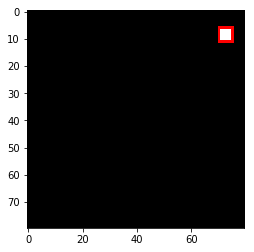

[array([[ 0.49899852, -0.67879784]], dtype=float32), None]


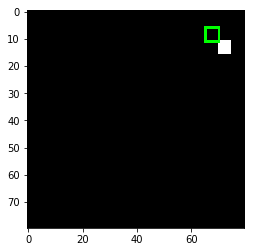

[array([[-0.00100113,  0.00257707]], dtype=float32), None]


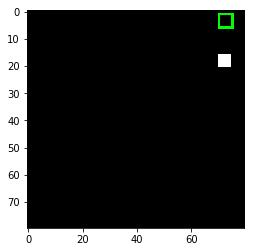

[array([[-0.00272591,  0.32660007]], dtype=float32), None]


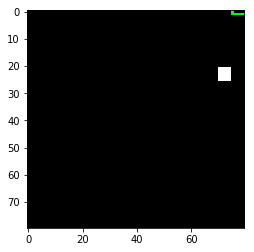

[array([[ 0.48946995, -0.01100572]], dtype=float32), None]


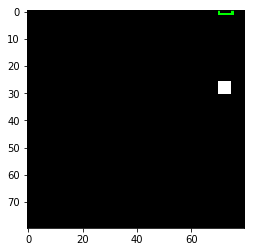

[array([[-0.06570345, -0.34116733]], dtype=float32), None]


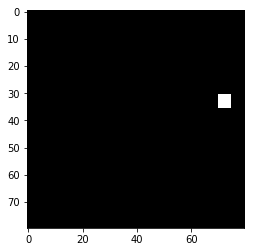

[array([[0.43212342, 0.05980355]], dtype=float32), None]


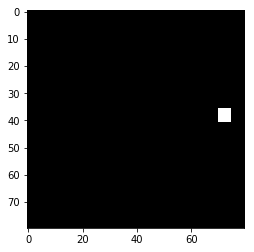

[array([[-0.00113922,  0.85958004]], dtype=float32), None]


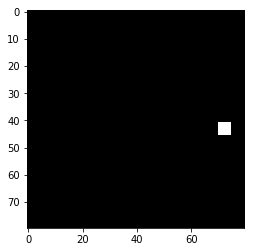

[array([[0.49974152, 0.49673373]], dtype=float32), None]


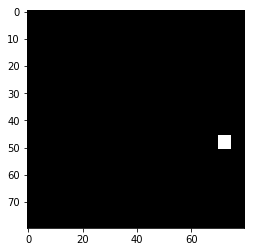

[array([[-0.00215988, -0.00326478]], dtype=float32), None]


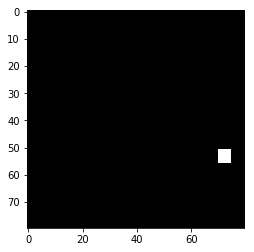

[array([[ 0.49799943, -0.00251235]], dtype=float32), None]


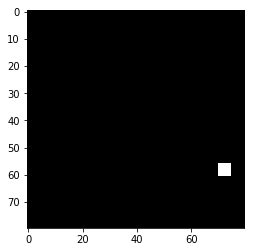

[array([[0.498513  , 0.49876276]], dtype=float32), None]


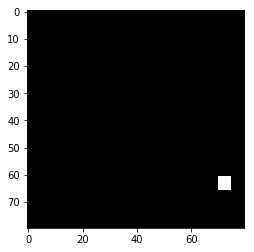

[array([[-0.11065024, -0.01118483]], dtype=float32), None]


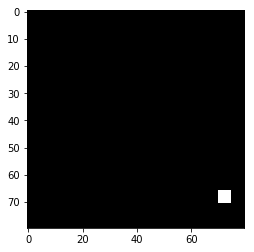

[array([[ 0.40234554, -0.0404569 ]], dtype=float32), None]


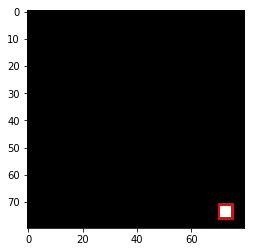

[4100.0, None]


3


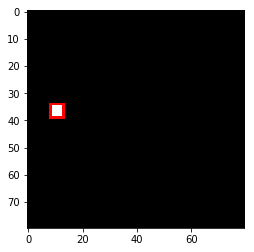

[array([[0.16680169, 0.03507531]], dtype=float32), None]


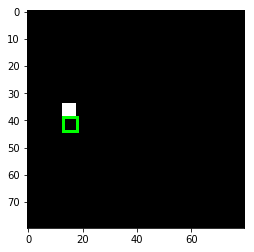

[array([[ 0.49792692, -0.00189024]], dtype=float32), None]


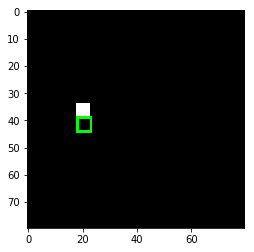

[array([[0.2423526 , 0.20683444]], dtype=float32), None]


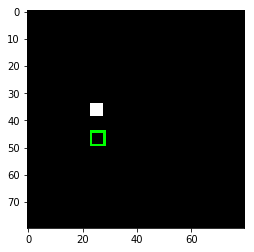

[array([[-0.0020779 ,  0.39764377]], dtype=float32), None]


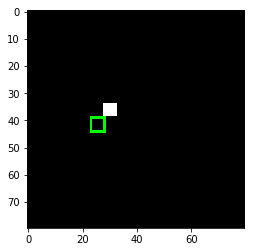

[array([[-0.00242843,  0.2872004 ]], dtype=float32), None]


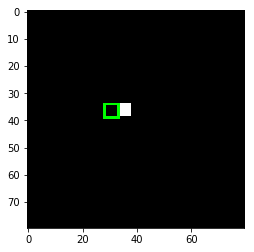

[array([[-0.00200427, -0.10144566]], dtype=float32), None]


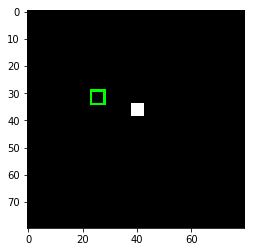

[array([[0.15085131, 0.0031116 ]], dtype=float32), None]


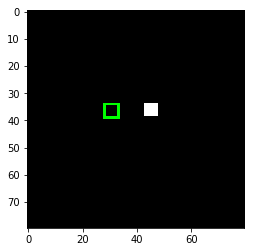

[array([[ 0.05597919, -0.00199753]], dtype=float32), None]


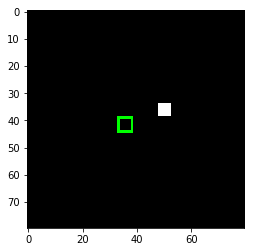

[array([[ 0.4979193 , -0.00199968]], dtype=float32), None]


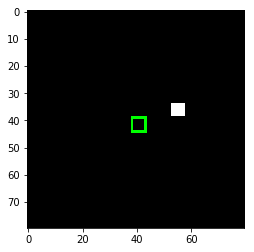

[array([[-0.00201973, -0.00185961]], dtype=float32), None]


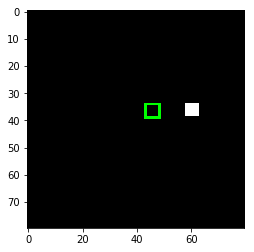

[array([[-0.00983853, -0.00097919]], dtype=float32), None]


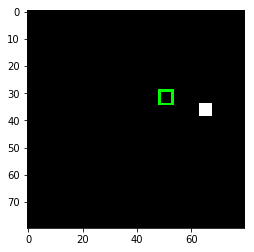

[array([[0.00397205, 0.19971937]], dtype=float32), None]


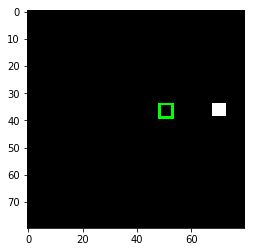

[array([[-0.00736306,  0.08821088]], dtype=float32), None]


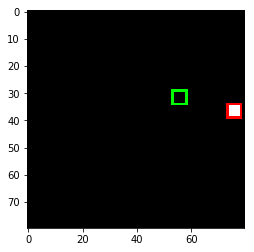

[212.5, None]


4


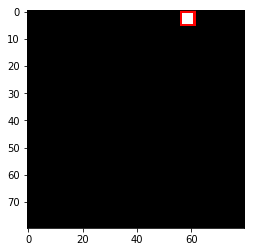

[array([[ 0.46628052, -0.11811821]], dtype=float32), None]


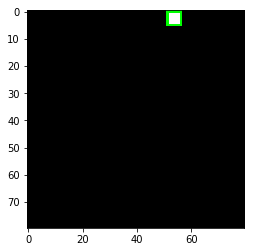

[array([[0.48186904, 0.583609  ]], dtype=float32), None]


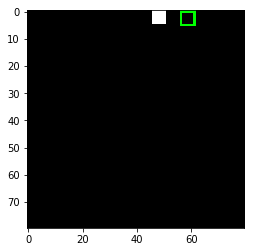

[array([[0.26058525, 0.04331213]], dtype=float32), None]


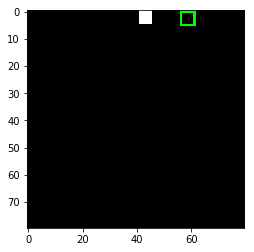

[array([[0.46111602, 0.0999254 ]], dtype=float32), None]


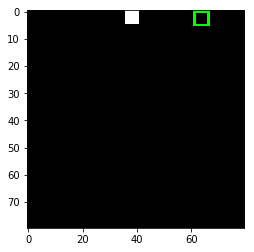

[array([[0.1761761, 0.0711751]], dtype=float32), None]


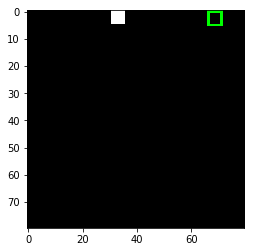

[array([[-0.02273157, -0.03549962]], dtype=float32), None]


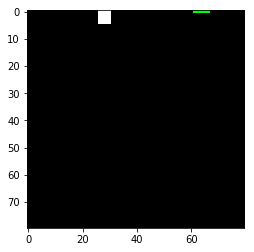

[array([[0.4608241 , 0.25911385]], dtype=float32), None]


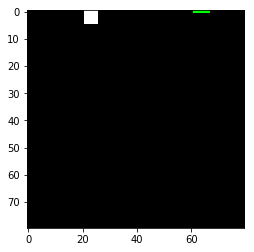

[array([[0.4909522, 0.5541899]], dtype=float32), None]


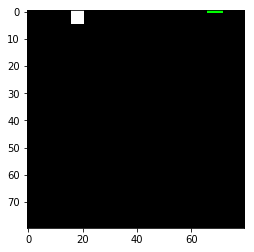

[array([[-0.01745719, -0.01087743]], dtype=float32), None]


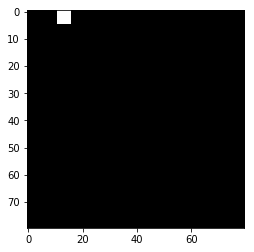

[array([[ 0.48509762, -0.00704625]], dtype=float32), None]


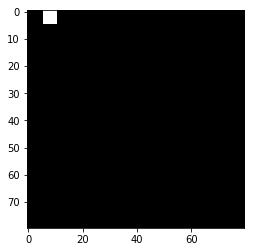

[array([[-0.06356322,  0.41136342]], dtype=float32), None]


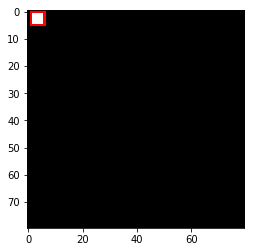

[1625.0, None]


5


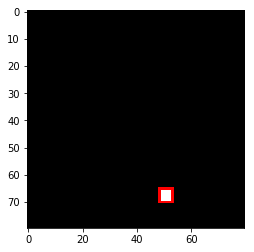

[array([[ 0.13047141, -0.15995337]], dtype=float32), None]


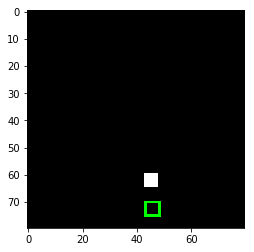

[array([[-0.00201805,  0.00020432]], dtype=float32), None]


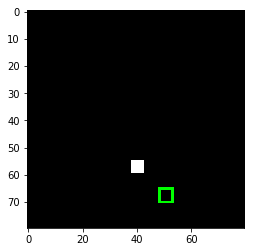

[array([[ 0.02086437, -0.00152165]], dtype=float32), None]


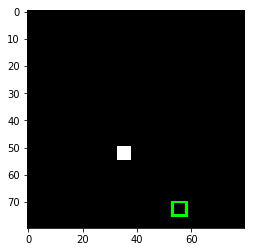

[array([[0.24050352, 0.48258653]], dtype=float32), None]


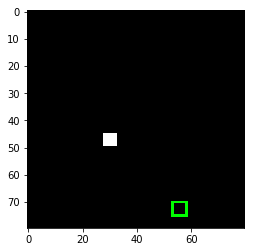

[array([[0.45963833, 0.00872654]], dtype=float32), None]


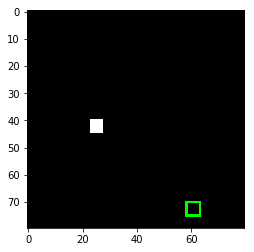

[array([[ 0.4979998 , -0.00161153]], dtype=float32), None]


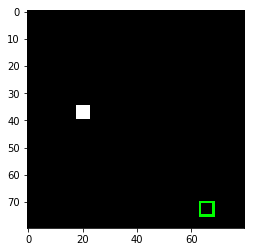

[array([[-0.00340362,  0.02917337]], dtype=float32), None]


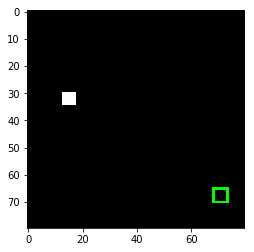

[array([[-0.45855838, -0.09273192]], dtype=float32), None]


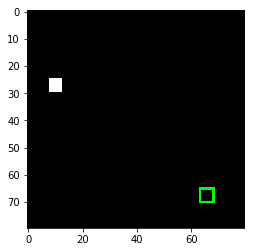

[array([[-0.03689745, -0.17279482]], dtype=float32), None]


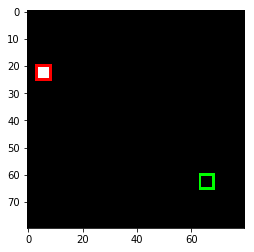

[2600.0, None]


6


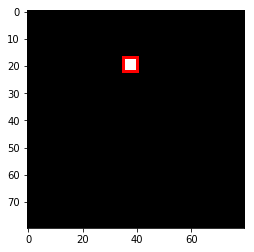

[array([[5.4061413e-05, 4.4950172e-01]], dtype=float32), None]


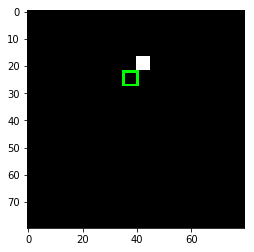

[array([[ 0.00694358, -0.0286202 ]], dtype=float32), None]


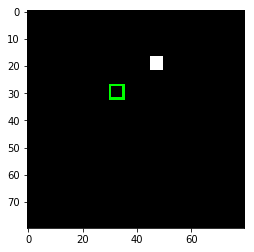

[array([[ 0.05566847, -0.00196594]], dtype=float32), None]


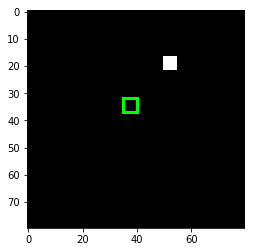

[array([[-0.00275435,  0.37823957]], dtype=float32), None]


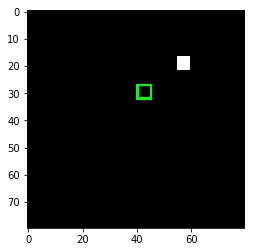

[array([[-0.0660281 , -0.04818248]], dtype=float32), None]


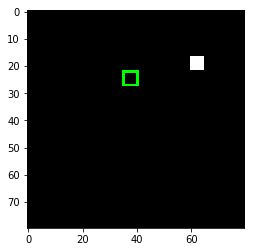

[array([[0.49799994, 0.00210738]], dtype=float32), None]


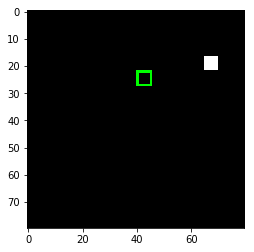

[array([[-0.0020053 , -0.00035745]], dtype=float32), None]


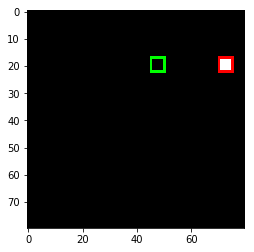

[312.5, None]


7


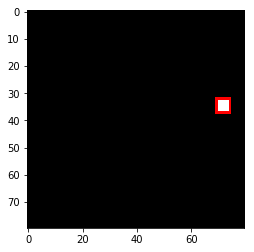

[array([[-0.01839589,  0.02102196]], dtype=float32), None]


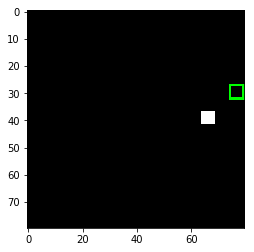

[array([[-0.00200118, -0.00199038]], dtype=float32), None]


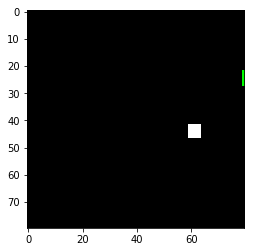

[array([[-0.00656113, -0.00186211]], dtype=float32), None]


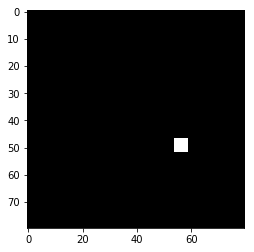

[array([[-0.00515838,  0.00138956]], dtype=float32), None]


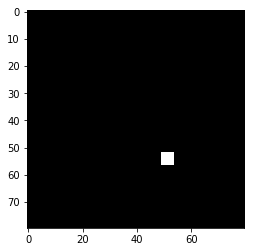

[array([[-0.01427072,  0.34851146]], dtype=float32), None]


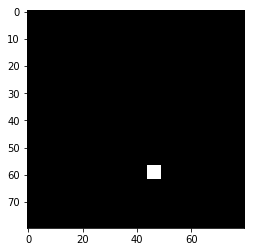

[array([[ 0.15702853, -0.01657512]], dtype=float32), None]


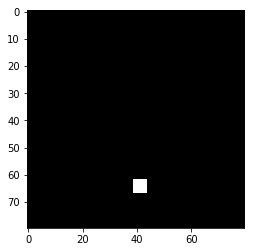

[array([[0.49779323, 0.1921581 ]], dtype=float32), None]


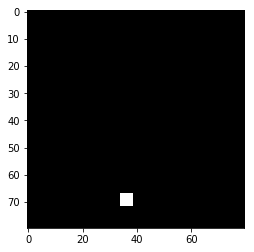

[array([[-0.00205601, -0.00110513]], dtype=float32), None]


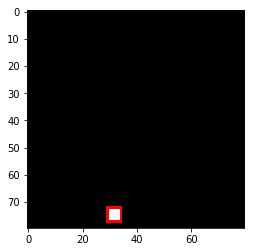

[4900.0, None]


8


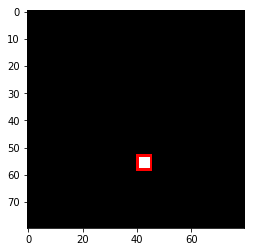

[array([[-0.00200001,  0.47654995]], dtype=float32), None]


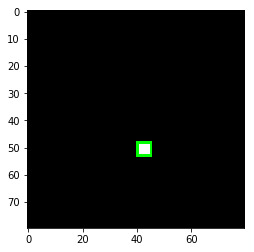

[array([[-0.00214622,  0.4976353 ]], dtype=float32), None]


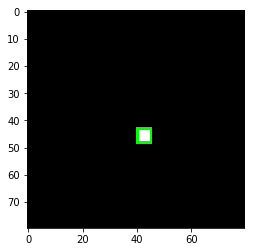

[array([[0.49585092, 0.49508482]], dtype=float32), None]


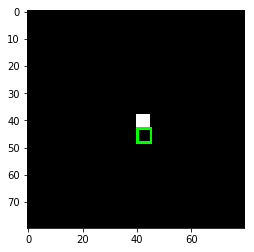

[array([[ 0.4979984 , -0.01546725]], dtype=float32), None]


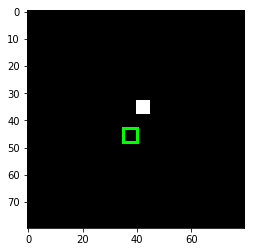

[array([[0.2598967, 0.4587967]], dtype=float32), None]


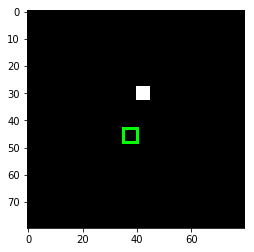

[array([[0.4262076 , 0.48293033]], dtype=float32), None]


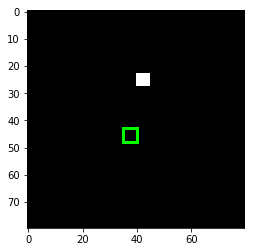

[array([[0.01956123, 0.49606842]], dtype=float32), None]


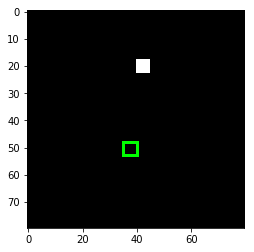

[array([[0.43786252, 0.1447264 ]], dtype=float32), None]


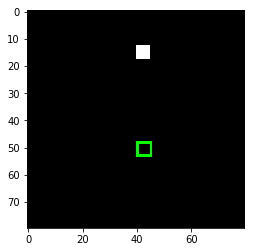

[array([[ 0.49622858, -0.00199944]], dtype=float32), None]


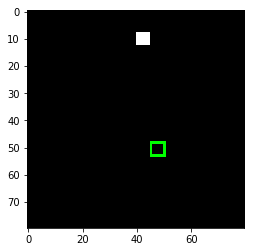

[array([[-0.00558467,  0.00405002]], dtype=float32), None]


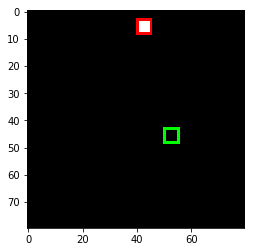

[850.0, None]


9


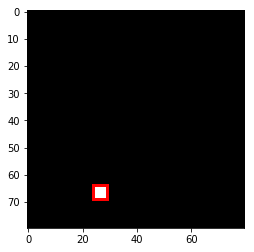

[array([[-0.03585761, -0.00199884]], dtype=float32), None]


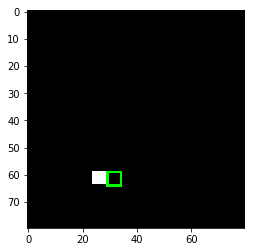

[array([[0.62151253, 0.05128801]], dtype=float32), None]


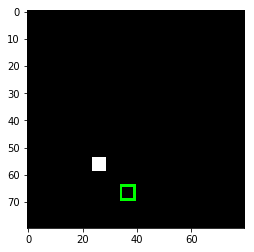

[array([[-0.00204297,  0.0711956 ]], dtype=float32), None]


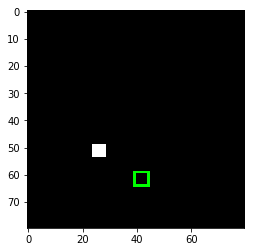

[array([[-0.0052677,  0.3718716]], dtype=float32), None]


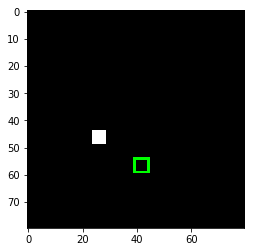

[array([[0.01448345, 0.08876759]], dtype=float32), None]


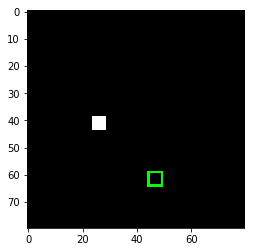

[array([[0.13832277, 0.14211917]], dtype=float32), None]


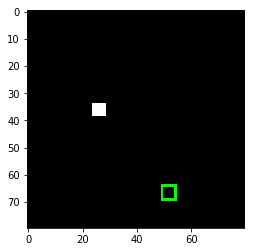

[array([[0.49797896, 0.06776452]], dtype=float32), None]


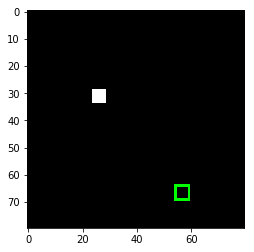

[array([[ 0.4962192, -0.0020076]], dtype=float32), None]


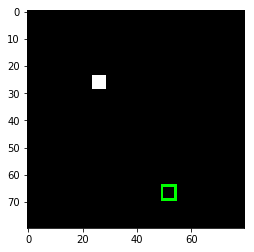

[array([[0.4979976 , 0.13363129]], dtype=float32), None]


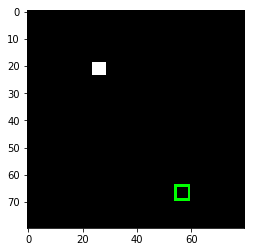

[array([[ 0.49745008, -0.09533385]], dtype=float32), None]


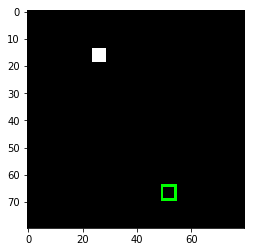

[array([[0.28901488, 0.32205856]], dtype=float32), None]


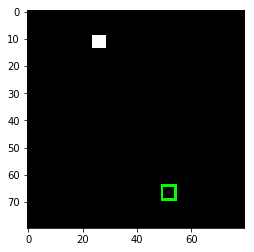

[array([[-0.01113261, -0.04576316]], dtype=float32), None]


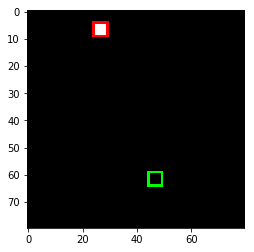

[1712.5, None]


10


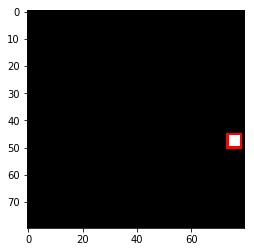

[array([[ 0.49183285, -0.00201189]], dtype=float32), None]


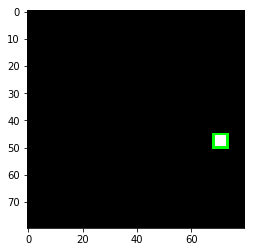

[array([[0.49792078, 0.06571931]], dtype=float32), None]


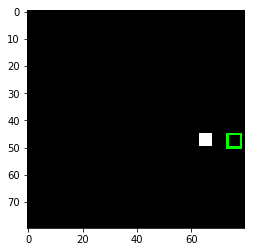

[array([[-0.0020009 , -0.00176603]], dtype=float32), None]


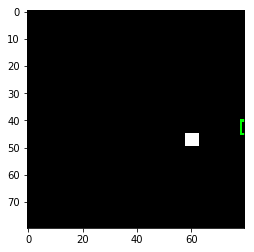

[array([[-1.46290455e-02, -5.60283661e-06]], dtype=float32), None]


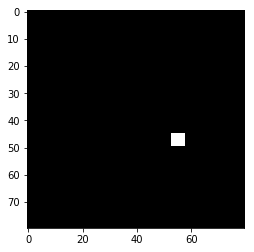

[array([[0.4977731 , 0.49651906]], dtype=float32), None]


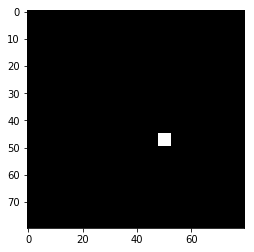

[array([[-0.00200003, -0.00202466]], dtype=float32), None]


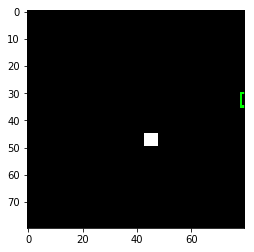

[array([[-0.00221839,  0.49784026]], dtype=float32), None]


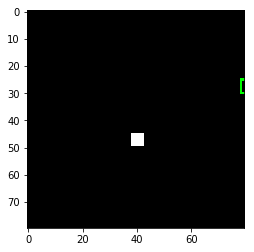

[array([[0.00198025, 0.00970238]], dtype=float32), None]


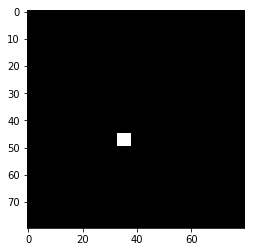

[array([[-0.33512595, -0.01068542]], dtype=float32), None]


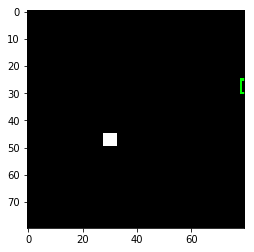

[array([[-0.00613071,  0.4686543 ]], dtype=float32), None]


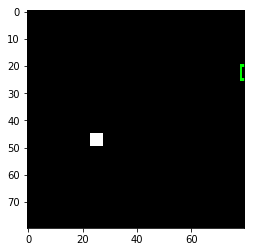

[array([[-0.00230111,  0.48107463]], dtype=float32), None]


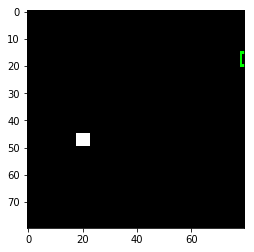

[array([[ 0.32389647, -0.00856519]], dtype=float32), None]


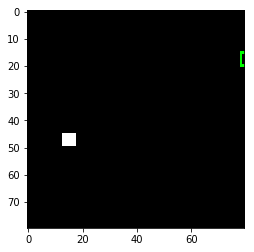

[array([[0.03365111, 0.2983864 ]], dtype=float32), None]


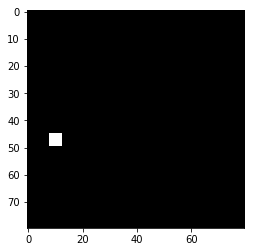

[array([[0.27707845, 0.4409114 ]], dtype=float32), None]


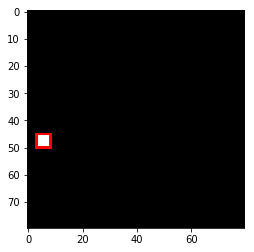

[3400.0, None]


11


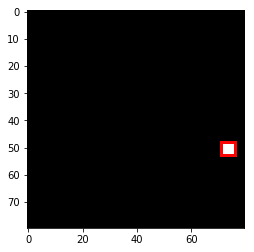

[array([[ 0.49207178, -0.00188413]], dtype=float32), None]


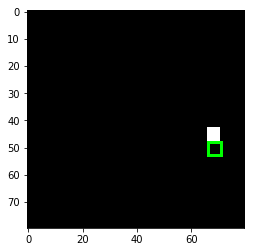

[array([[ 0.49897197, -0.00065929]], dtype=float32), None]


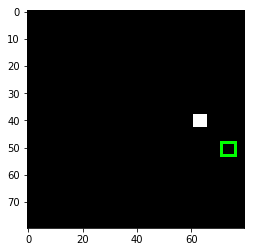

[array([[-0.0020005, -0.0019998]], dtype=float32), None]


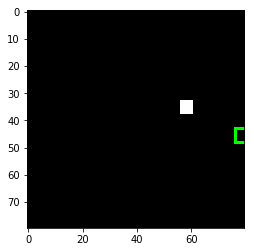

[array([[0.4959859 , 0.00305492]], dtype=float32), None]


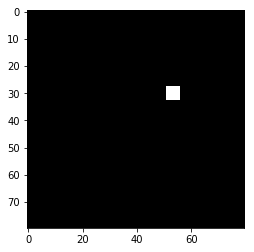

[array([[0.00074297, 0.1968436 ]], dtype=float32), None]


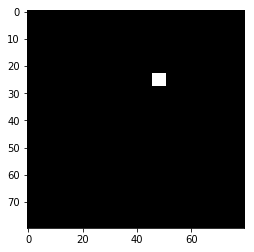

[array([[ 0.25108272, -0.01936447]], dtype=float32), None]


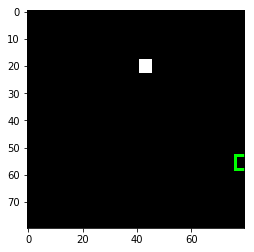

[array([[ 0.1141296 , -0.00189477]], dtype=float32), None]


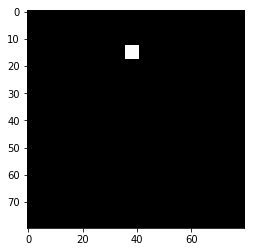

[array([[0.3183751 , 0.02089542]], dtype=float32), None]


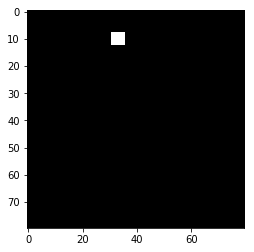

[array([[-0.00399354,  0.3848999 ]], dtype=float32), None]


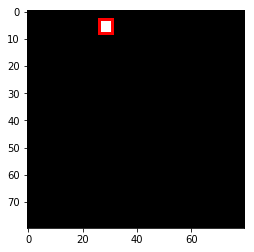

[3312.5, None]


12


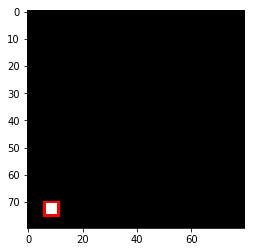

[array([[0.49876246, 0.00175238]], dtype=float32), None]


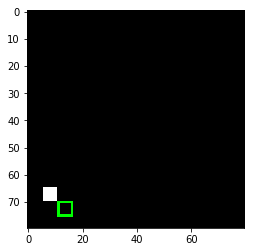

[array([[0.49772245, 0.47840753]], dtype=float32), None]


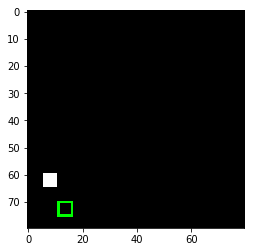

[array([[ 0.1884433, -0.0514791]], dtype=float32), None]


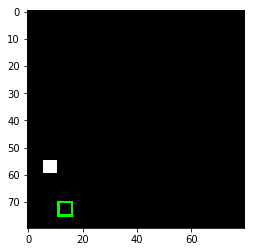

[array([[-0.00170571,  0.1048097 ]], dtype=float32), None]


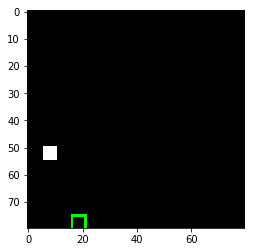

[array([[0.01781452, 0.2981362 ]], dtype=float32), None]


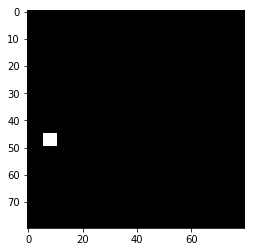

[array([[ 0.06262362, -0.00598383]], dtype=float32), None]


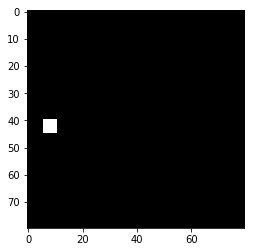

[array([[0.15423733, 0.20461231]], dtype=float32), None]


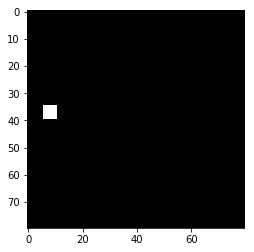

[array([[0.06042838, 0.03308183]], dtype=float32), None]


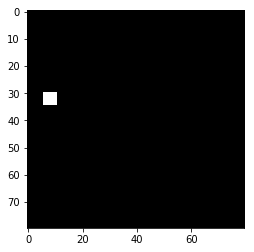

[array([[-0.00127   ,  0.11805981]], dtype=float32), None]


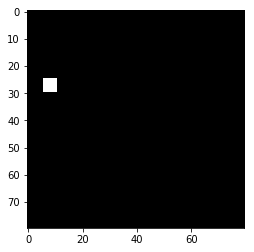

[array([[-0.00462519,  0.49721754]], dtype=float32), None]


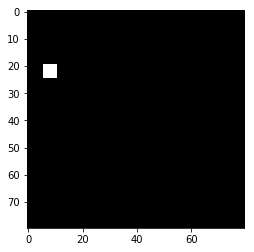

[array([[-0.00414903,  0.5262517 ]], dtype=float32), None]


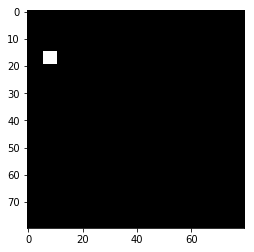

[array([[ 0.48428085, -0.10112119]], dtype=float32), None]


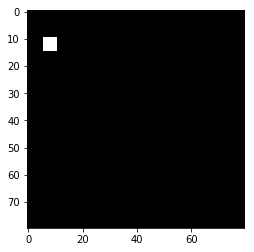

[array([[-0.01783206, -0.01357923]], dtype=float32), None]


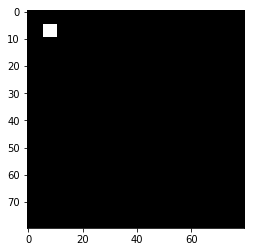

[array([[0.49632114, 0.48769897]], dtype=float32), None]


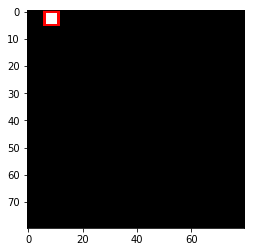

[3662.5, None]


13


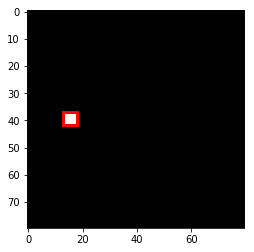

[array([[ 0.22299075, -0.00160068]], dtype=float32), None]


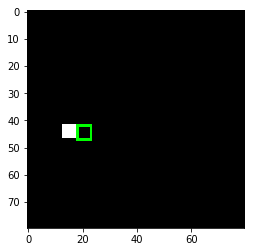

[array([[0.2349109, 0.8129583]], dtype=float32), None]


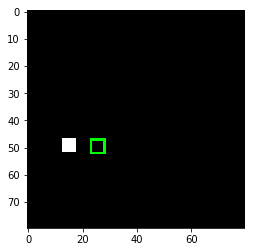

[array([[0.00729668, 0.02465403]], dtype=float32), None]


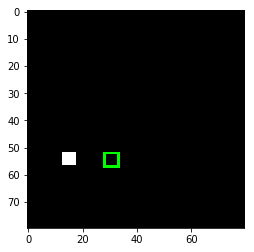

[array([[-0.04038687, -0.00086206]], dtype=float32), None]


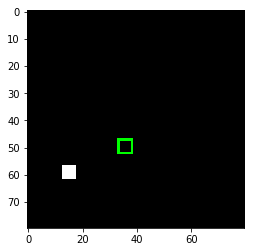

[array([[ 0.6052499 , -0.00169867]], dtype=float32), None]


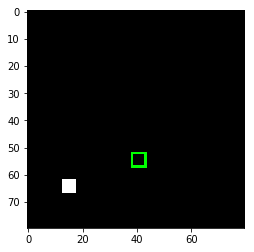

[array([[ 0.49760967, -0.0019998 ]], dtype=float32), None]


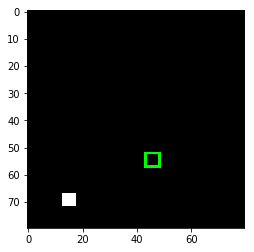

[array([[0.49794173, 0.0488472 ]], dtype=float32), None]


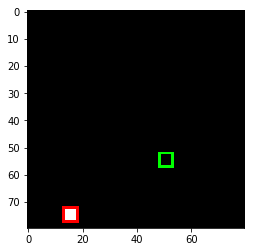

[812.5, None]


14


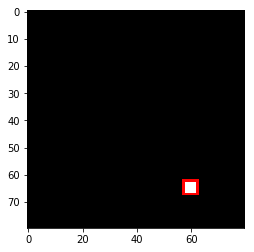

[array([[-0.00515199,  0.4976965 ]], dtype=float32), None]


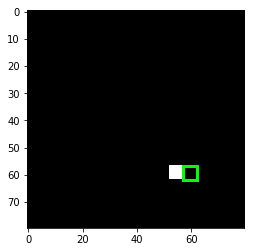

[array([[-0.00365625, -0.16530018]], dtype=float32), None]


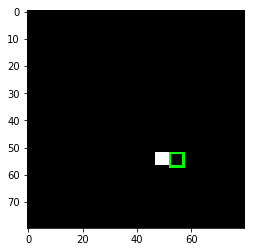

[array([[0.49899992, 0.4989994 ]], dtype=float32), None]


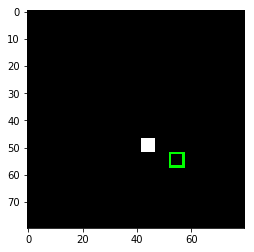

[array([[ 0.00339586, -0.00148945]], dtype=float32), None]


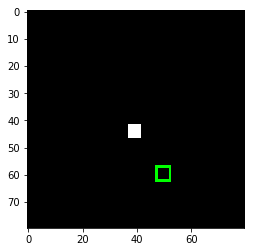

[array([[ 0.47713104, -0.00652659]], dtype=float32), None]


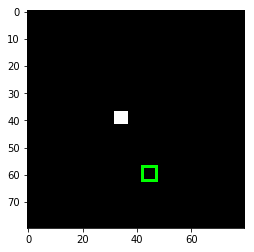

[array([[-0.00222888,  0.51840675]], dtype=float32), None]


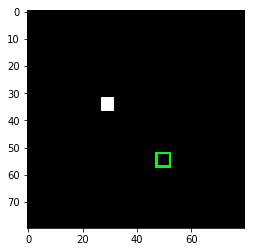

[array([[0.49799308, 0.38636932]], dtype=float32), None]


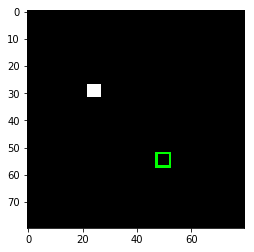

[array([[-0.002    ,  0.4937883]], dtype=float32), None]


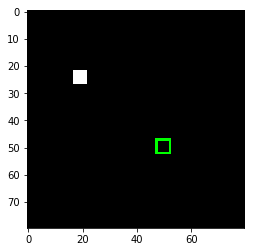

[array([[-0.00341988, -0.22005013]], dtype=float32), None]


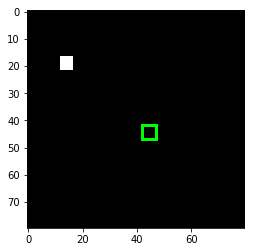

[array([[-0.04085633,  0.31136757]], dtype=float32), None]


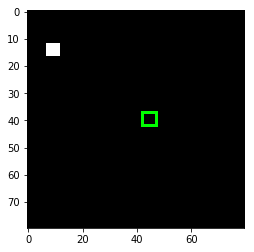

[array([[-0.14658886, -0.1360227 ]], dtype=float32), None]


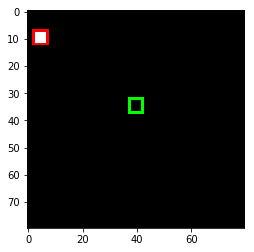

[925.0, None]


15


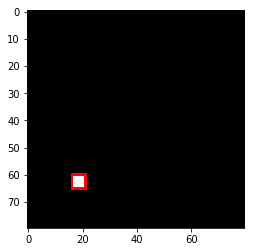

[array([[0.49794403, 0.00763601]], dtype=float32), None]


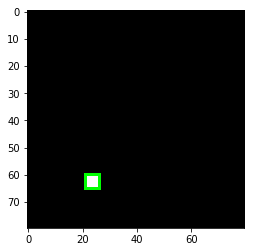

[array([[ 0.4823757 , -0.00195426]], dtype=float32), None]


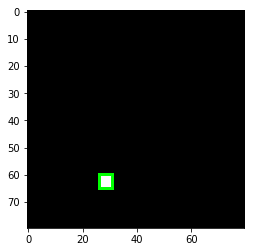

[array([[0.4956641, 0.0641216]], dtype=float32), None]


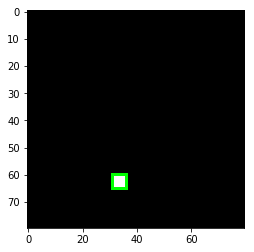

[array([[0.37366694, 0.0189755 ]], dtype=float32), None]


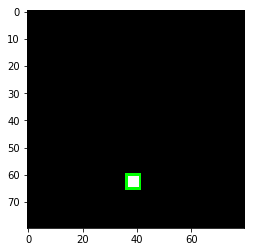

[array([[ 0.74841905, -0.66433203]], dtype=float32), None]


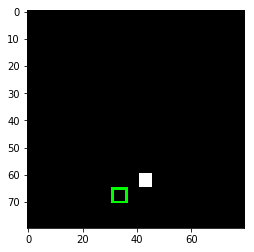

[array([[-0.14850716,  0.49790832]], dtype=float32), None]


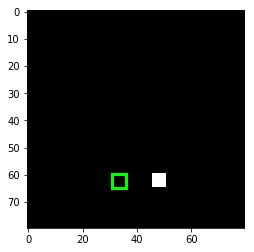

[array([[-0.15504405,  0.49409485]], dtype=float32), None]


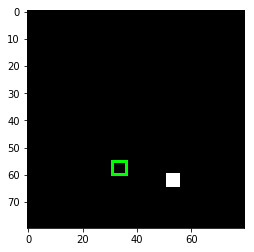

[array([[0.4960363 , 0.47883004]], dtype=float32), None]


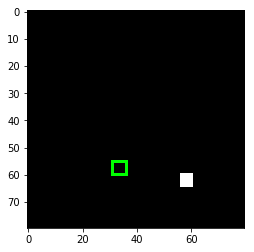

[array([[0.49794593, 0.32801688]], dtype=float32), None]


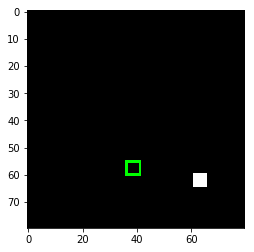

[array([[-0.00200047,  0.497997  ]], dtype=float32), None]


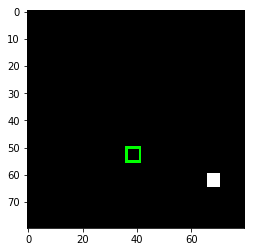

[array([[0.49797276, 0.49763334]], dtype=float32), None]


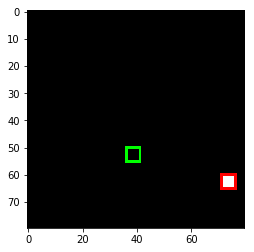

[662.5, None]


16


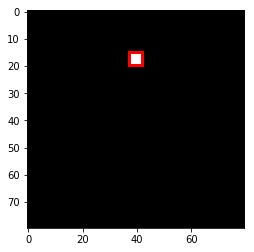

[array([[0.01526761, 0.44880977]], dtype=float32), None]


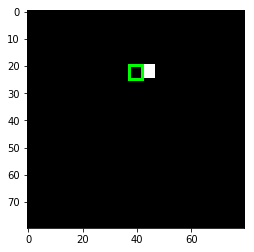

[array([[-0.00193471,  0.37878686]], dtype=float32), None]


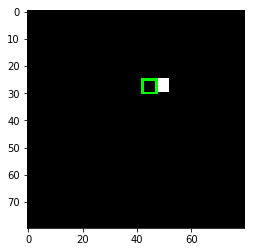

[array([[ 0.49721146, -0.00197977]], dtype=float32), None]


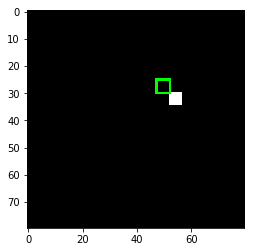

[array([[ 0.4979858 , -0.00199574]], dtype=float32), None]


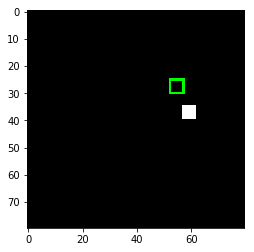

[array([[ 0.49788052, -0.00149709]], dtype=float32), None]


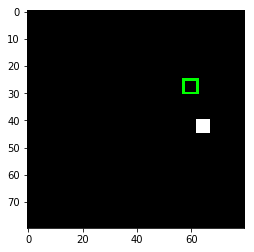

[array([[ 0.33231044, -0.00205914]], dtype=float32), None]


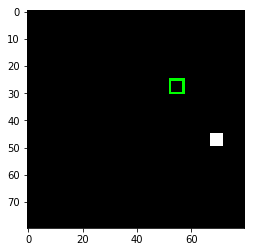

[array([[-0.00423264, -0.00618462]], dtype=float32), None]


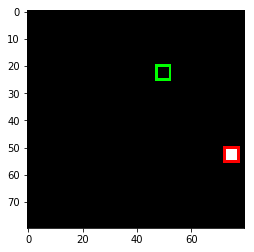

[762.5, None]


17


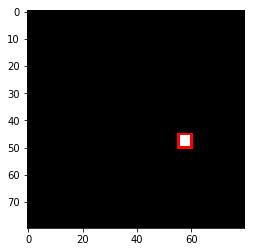

[array([[-0.00415112, -0.00183171]], dtype=float32), None]


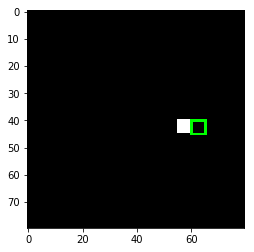

[array([[-0.00216935, -0.0019986 ]], dtype=float32), None]


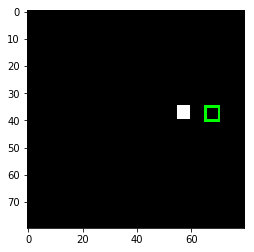

[array([[ 0.49786586, -0.00199944]], dtype=float32), None]


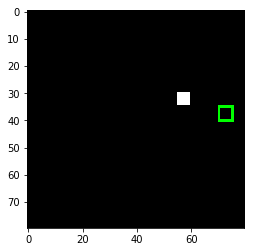

[array([[-0.00248929,  0.02121723]], dtype=float32), None]


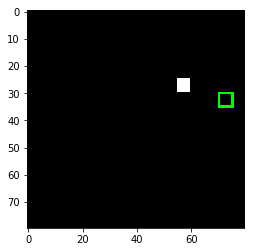

[array([[0.4923562, 0.3740095]], dtype=float32), None]


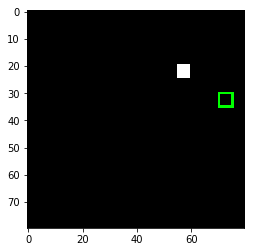

[array([[ 0.49782607, -0.36666507]], dtype=float32), None]


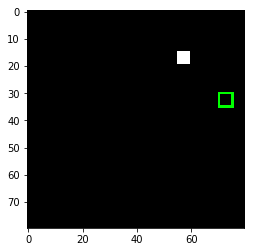

[array([[0.1631594, 0.6744626]], dtype=float32), None]


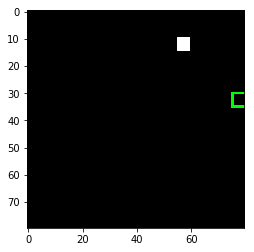

[array([[-0.02551855,  0.49635223]], dtype=float32), None]


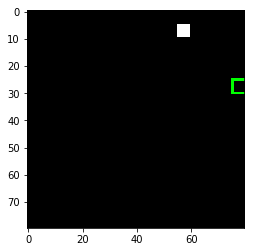

[array([[ 0.4948668 , -0.46271774]], dtype=float32), None]


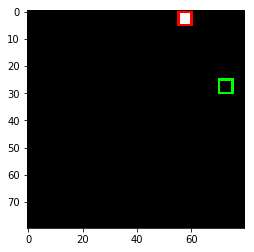

[425.0, None]


18


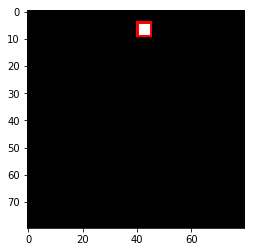

[array([[-0.00996551,  0.01323497]], dtype=float32), None]


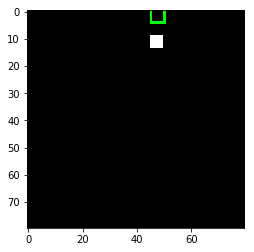

[array([[-0.03350963,  0.00539577]], dtype=float32), None]


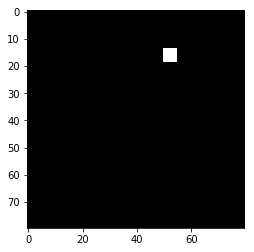

[array([[-0.02914999, -0.05643995]], dtype=float32), None]


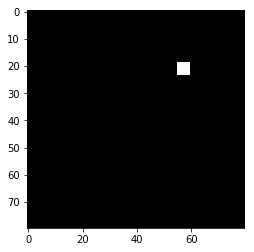

[array([[0.29028684, 0.41652405]], dtype=float32), None]


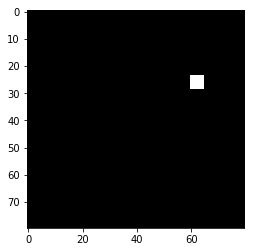

[array([[-0.00058746,  0.44043148]], dtype=float32), None]


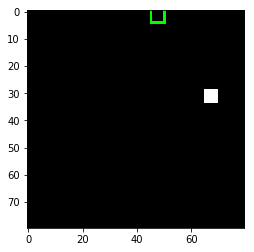

[array([[0.37673682, 0.10527706]], dtype=float32), None]


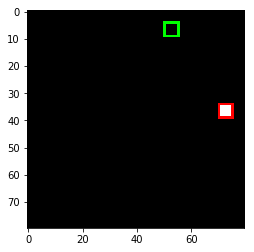

[650.0, None]


19


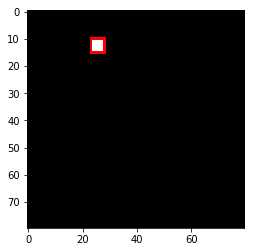

[array([[-0.01867379,  0.47846755]], dtype=float32), None]


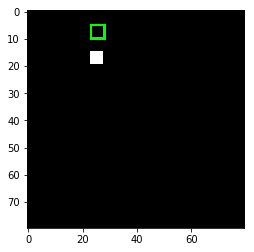

[array([[-0.00223056,  0.0894292 ]], dtype=float32), None]


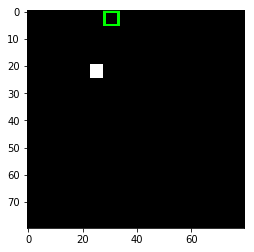

[array([[-0.00212307, -0.00250434]], dtype=float32), None]


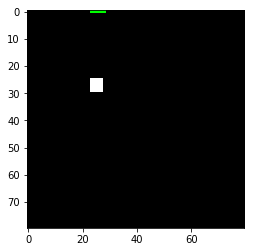

[array([[0.48186925, 0.02485144]], dtype=float32), None]


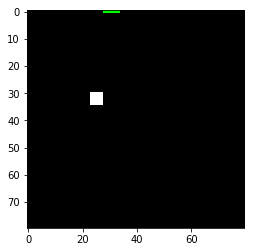

[array([[0.01821989, 0.07350254]], dtype=float32), None]


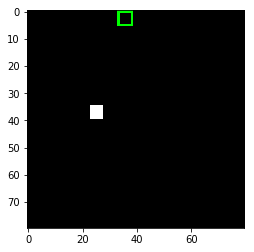

[array([[0.33374768, 0.00381964]], dtype=float32), None]


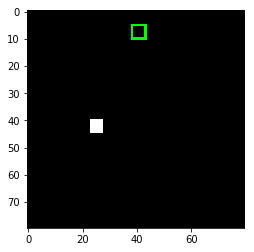

[array([[ 0.44186476, -0.08463518]], dtype=float32), None]


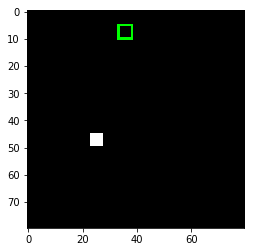

[array([[0.4971171, 0.4977461]], dtype=float32), None]


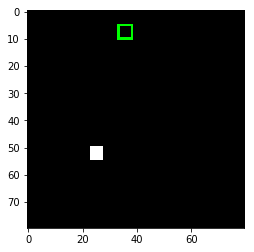

[array([[-0.00962508,  0.46172738]], dtype=float32), None]


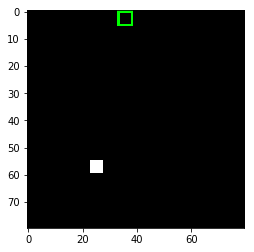

[array([[ 0.49799752, -0.00199491]], dtype=float32), None]


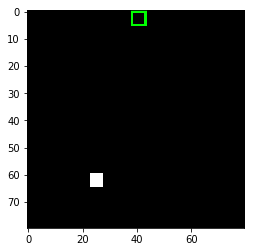

[array([[-0.00223349, -0.00174862]], dtype=float32), None]


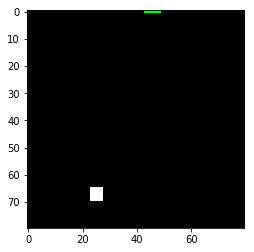

[array([[-0.00594753,  0.00068456]], dtype=float32), None]


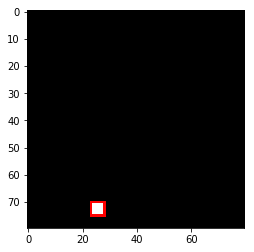

[3512.5, None]


20


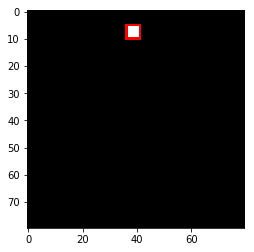

[array([[ 0.7404102 , -0.00185829]], dtype=float32), None]


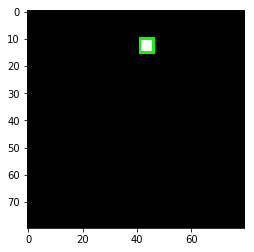

[array([[ 0.42215282, -0.23973468]], dtype=float32), None]


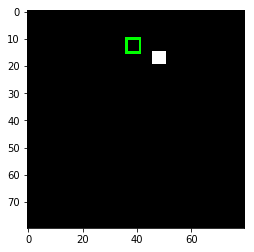

[array([[-0.00181347, -0.00197405]], dtype=float32), None]


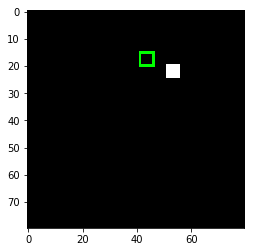

[array([[-0.00223451,  0.67774004]], dtype=float32), None]


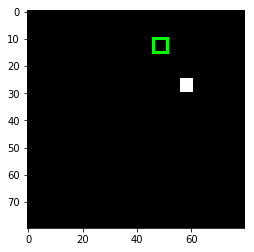

[array([[-2.1523887e-01, -2.5391579e-05]], dtype=float32), None]


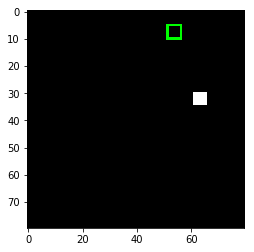

[array([[-0.00096262,  0.06824613]], dtype=float32), None]


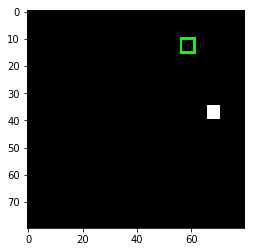

[array([[-0.00212259, -0.1647212 ]], dtype=float32), None]


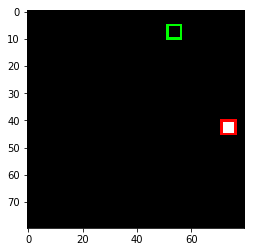

[812.5, None]


21


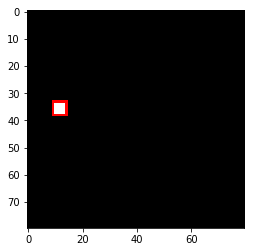

[array([[-4.2742413e-01,  2.3627281e-04]], dtype=float32), None]


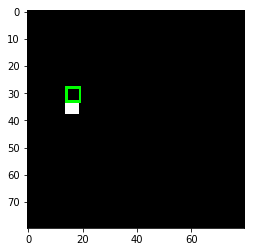

[array([[ 0.47109953, -0.00197643]], dtype=float32), None]


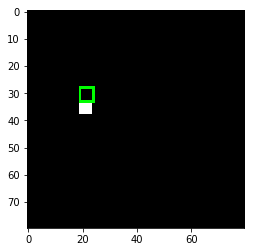

[array([[0.08153427, 0.01221138]], dtype=float32), None]


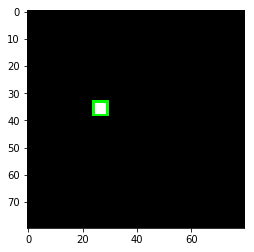

[array([[-0.0026126 ,  0.47639003]], dtype=float32), None]


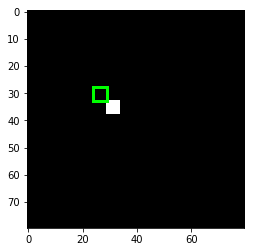

[array([[ 0.4979975 , -0.25195676]], dtype=float32), None]


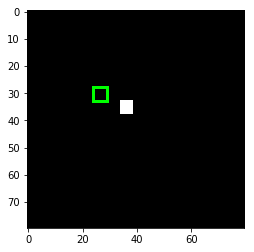

[array([[-0.00200019,  0.41475615]], dtype=float32), None]


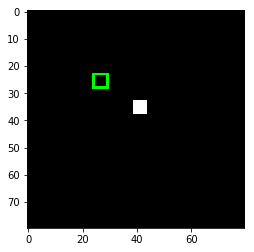

[array([[ 0.01054209, -0.00193816]], dtype=float32), None]


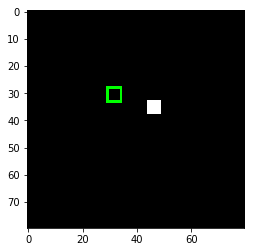

[array([[-0.4823512 , -0.00199896]], dtype=float32), None]


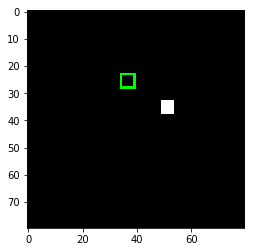

[array([[ 0.49798158, -0.00199991]], dtype=float32), None]


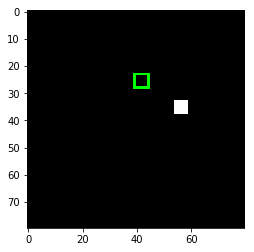

[array([[ 0.4978589 , -0.00185031]], dtype=float32), None]


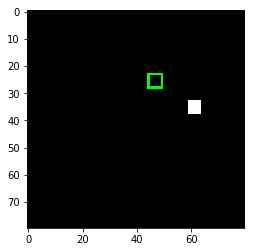

[array([[0.04802716, 0.18541044]], dtype=float32), None]


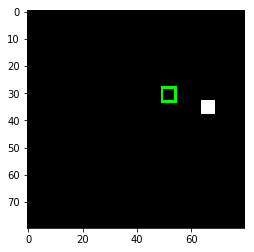

[array([[0.0278039 , 0.26147288]], dtype=float32), None]


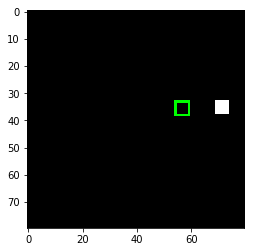

[array([[0.48833326, 0.2963068 ]], dtype=float32), None]


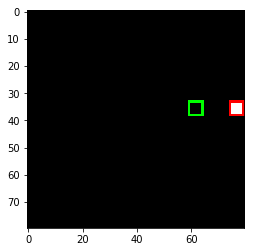

[112.5, None]


22


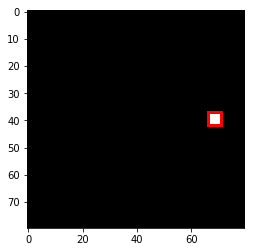

[array([[ 0.49899957, -0.00094694]], dtype=float32), None]


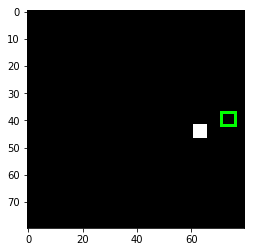

[array([[-0.00101996, -0.00079405]], dtype=float32), None]


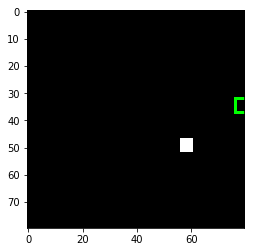

[array([[ 0.48331466, -0.0016064 ]], dtype=float32), None]


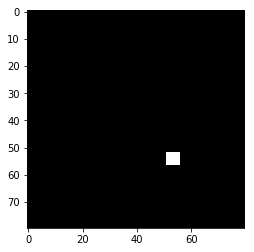

[array([[-0.00234049,  0.47392607]], dtype=float32), None]


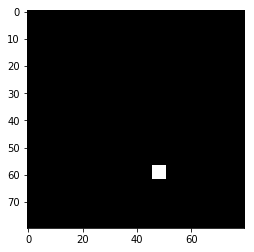

[array([[ 0.8578957 , -0.00589377]], dtype=float32), None]


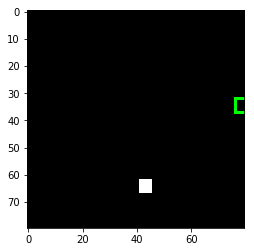

[array([[0.4979968 , 0.00406933]], dtype=float32), None]


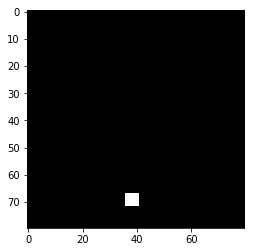

[array([[0.49793896, 0.04839116]], dtype=float32), None]


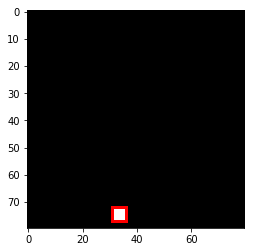

[2312.5, None]


23


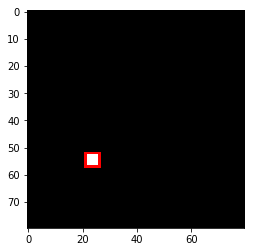

[array([[0.03145999, 0.03679228]], dtype=float32), None]


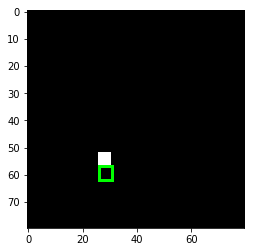

[array([[-0.00135189,  0.28105962]], dtype=float32), None]


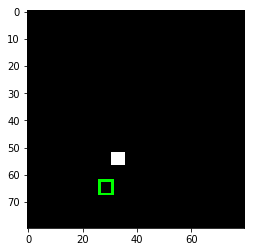

[array([[-0.00210716, -0.78267723]], dtype=float32), None]


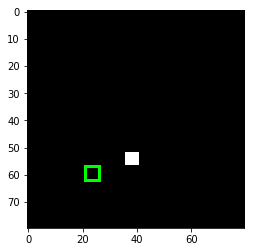

[array([[0.49799687, 0.82536787]], dtype=float32), None]


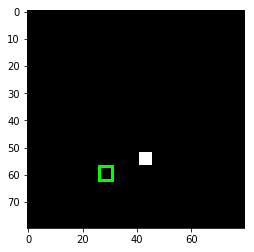

[array([[-0.01767453,  0.52342916]], dtype=float32), None]


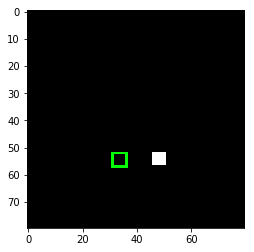

[array([[-0.04784357, -0.00186139]], dtype=float32), None]


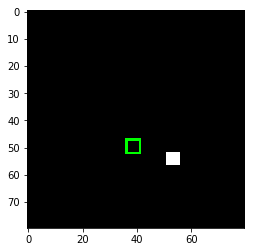

[array([[0.49877924, 0.20252085]], dtype=float32), None]


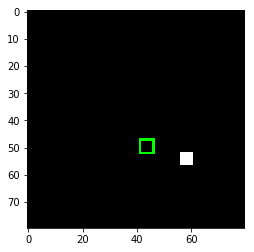

[array([[ 0.4918177 , -0.00204168]], dtype=float32), None]


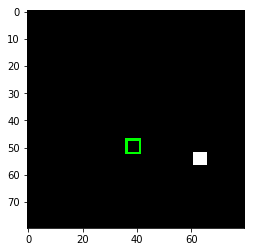

[array([[-0.00229861, -0.00208605]], dtype=float32), None]


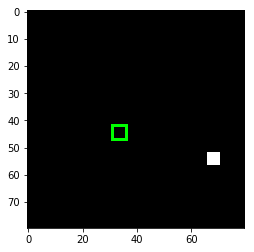

[array([[-0.00344368,  0.4902679 ]], dtype=float32), None]


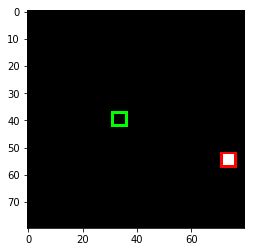

[912.5, None]


24


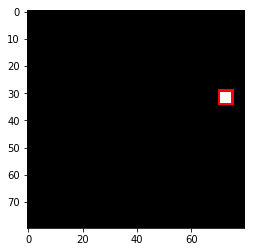

[array([[0.3702526 , 0.20213336]], dtype=float32), None]


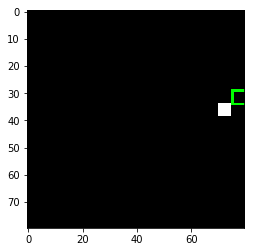

[array([[-0.0010538 ,  0.27690512]], dtype=float32), None]


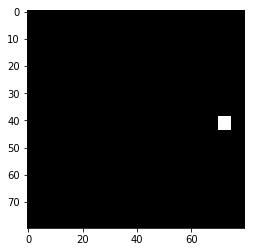

[array([[0.497997  , 0.47469416]], dtype=float32), None]


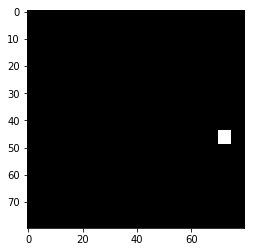

[array([[0.49799365, 0.4978425 ]], dtype=float32), None]


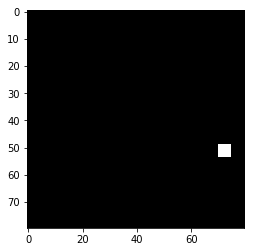

[array([[-0.00200402,  0.4975419 ]], dtype=float32), None]


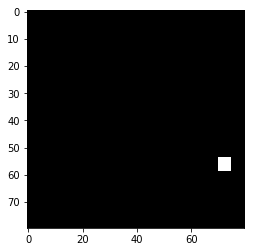

[array([[0.4979999 , 0.49799234]], dtype=float32), None]


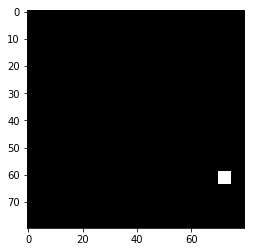

[array([[-0.3455033 , -0.01073381]], dtype=float32), None]


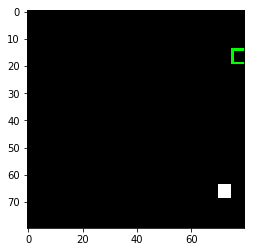

[array([[-0.02978931, -0.00539485]], dtype=float32), None]


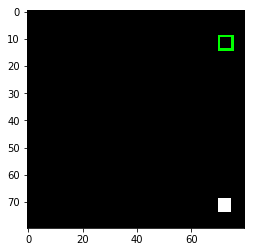

[array([[ 0.49675888, -0.02547847]], dtype=float32), None]


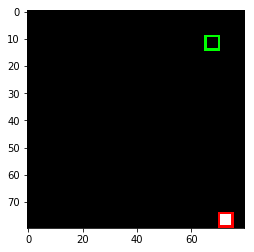

[2125.0, None]


25


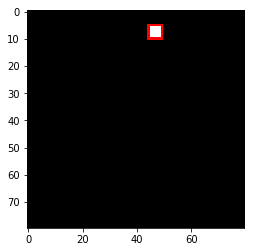

[array([[-0.16563863, -0.00106317]], dtype=float32), None]


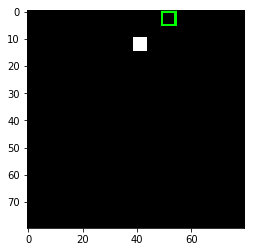

[array([[-0.00088602, -0.00178641]], dtype=float32), None]


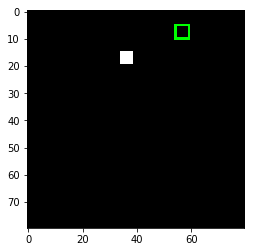

[array([[0.49799627, 0.10415858]], dtype=float32), None]


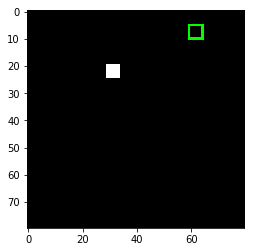

[array([[ 0.96314055, -0.00100701]], dtype=float32), None]


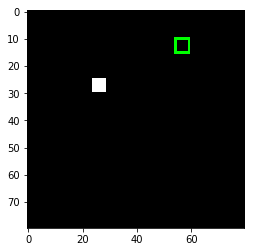

[array([[0.4636506 , 0.02871394]], dtype=float32), None]


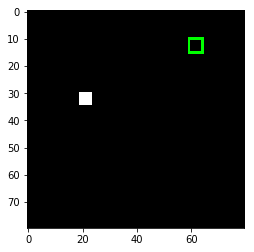

[array([[-0.01510906,  0.00831193]], dtype=float32), None]


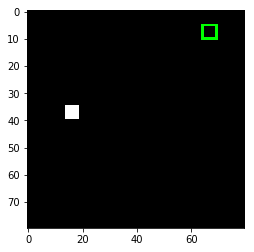

[array([[ 0.27134395, -0.00208567]], dtype=float32), None]


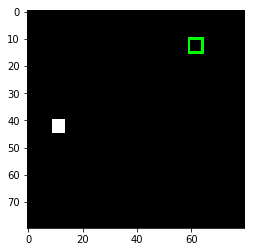

[array([[ 0.00756013, -0.01693887]], dtype=float32), None]


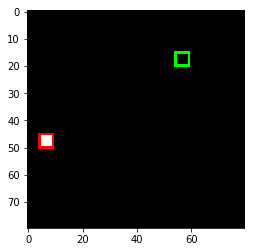

[1700.0, None]


26


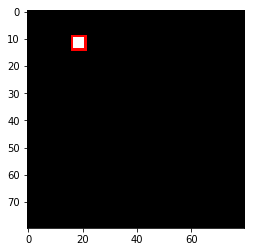

[array([[ 0.4034872 , -0.04033306]], dtype=float32), None]


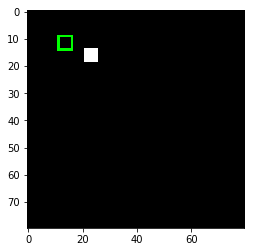

[array([[0.4978273 , 0.22889358]], dtype=float32), None]


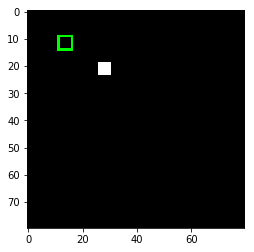

[array([[0.25030357, 0.29120916]], dtype=float32), None]


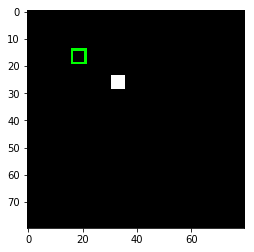

[array([[-0.00200331, -0.00953573]], dtype=float32), None]


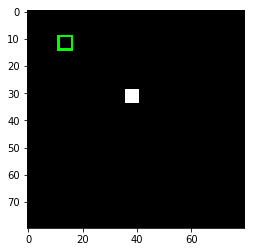

[array([[-0.00920094, -0.19191355]], dtype=float32), None]


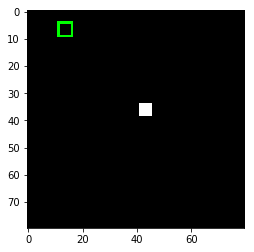

[array([[0.08741343, 0.00220007]], dtype=float32), None]


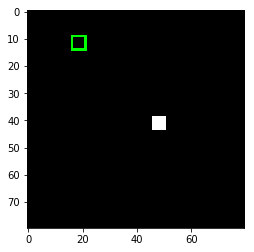

[array([[0.4768432 , 0.01767719]], dtype=float32), None]


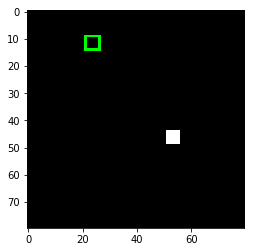

[array([[0.49729288, 0.0108332 ]], dtype=float32), None]


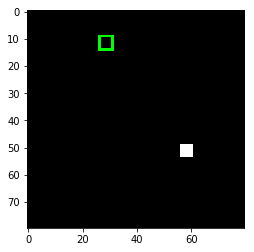

[array([[ 0.49657708, -0.00213527]], dtype=float32), None]


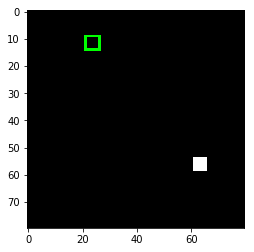

[array([[-0.00200127,  0.49798617]], dtype=float32), None]


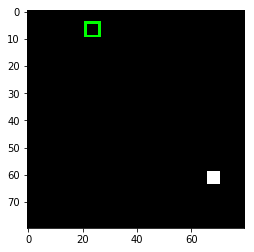

[array([[ 0.17309034, -0.03431679]], dtype=float32), None]


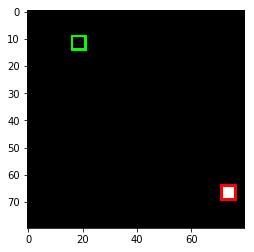

[3025.0, None]


27


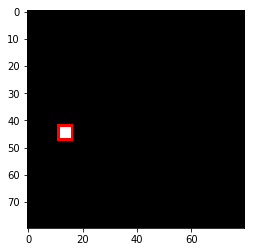

[array([[ 0.49102977, -0.00187296]], dtype=float32), None]


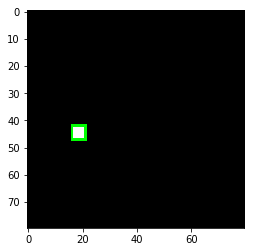

[array([[-0.00337636, -0.2793708 ]], dtype=float32), None]


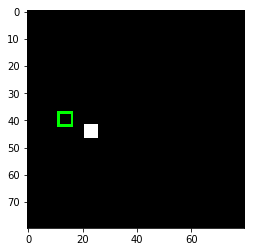

[array([[-0.00052649,  0.41480348]], dtype=float32), None]


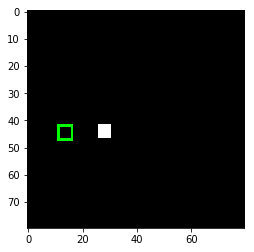

[array([[-0.00198489, -0.01725337]], dtype=float32), None]


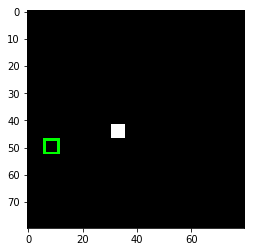

[array([[-0.00199884, -0.00876096]], dtype=float32), None]


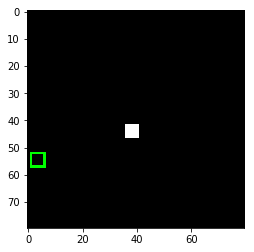

[array([[-0.00495421,  0.49705958]], dtype=float32), None]


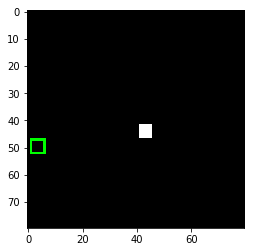

[array([[ 0.4977139 , -0.14105381]], dtype=float32), None]


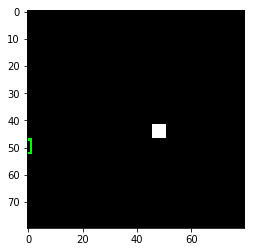

[array([[ 0.07154053, -0.8672003 ]], dtype=float32), None]


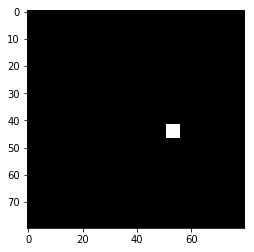

[array([[-0.00209191, -0.00199014]], dtype=float32), None]


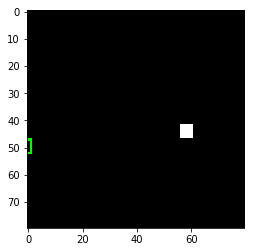

[array([[ 0.49799338, -0.0019905 ]], dtype=float32), None]


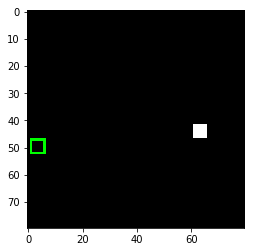

[array([[ 0.43468416, -0.00956329]], dtype=float32), None]


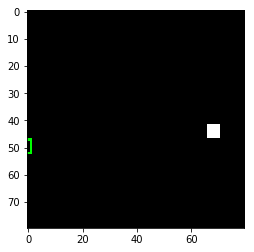

[array([[-0.00230194,  0.20526844]], dtype=float32), None]


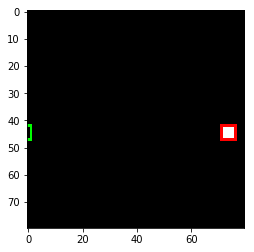

[2812.5, None]


28


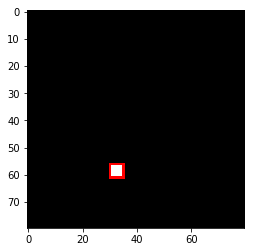

[array([[ 0.00054139, -0.00175554]], dtype=float32), None]


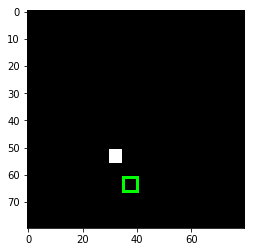

[array([[ 2.1493435e-04, -2.1888021e-01]], dtype=float32), None]


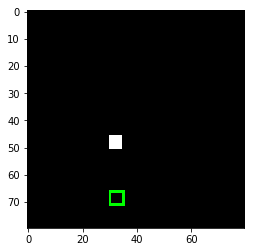

[array([[0.04890907, 0.48039457]], dtype=float32), None]


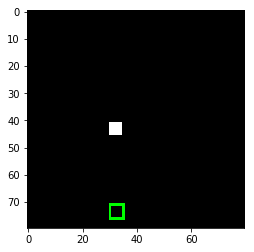

[array([[ 0.49768355, -0.00267558]], dtype=float32), None]


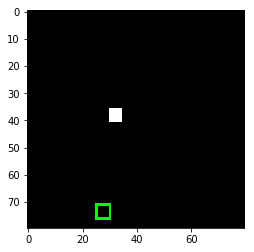

[array([[0.4979617 , 0.06158179]], dtype=float32), None]


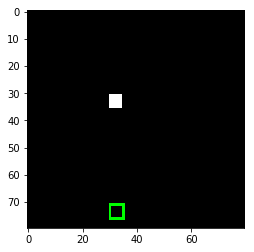

[array([[-0.00230848,  0.49704292]], dtype=float32), None]


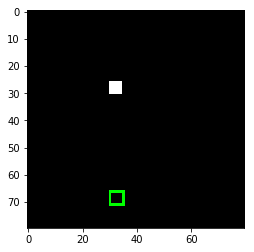

[array([[0.49799818, 0.00082564]], dtype=float32), None]


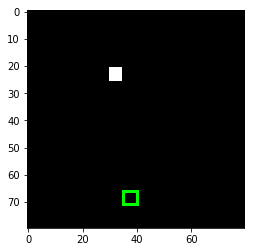

[array([[0.15361643, 0.0091607 ]], dtype=float32), None]


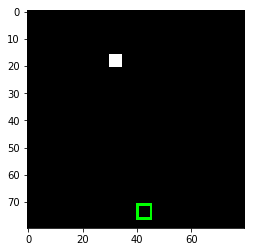

[array([[-0.552833  ,  0.00070029]], dtype=float32), None]


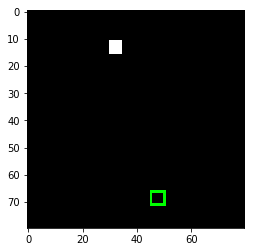

[array([[-0.03551607, -0.00188321]], dtype=float32), None]


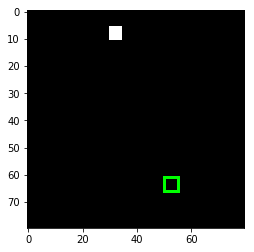

[array([[-0.02866441,  0.04007292]], dtype=float32), None]


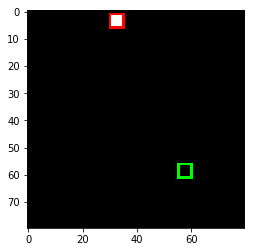

[1825.0, None]


29


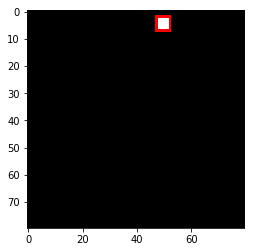

[array([[-0.04388878, -0.00199777]], dtype=float32), None]


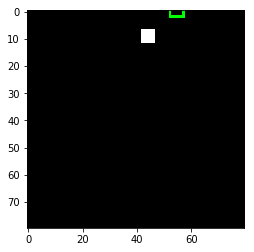

[array([[ 0.0460133 , -0.00194556]], dtype=float32), None]


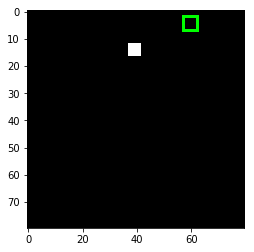

[array([[ 0.04229069, -0.00194567]], dtype=float32), None]


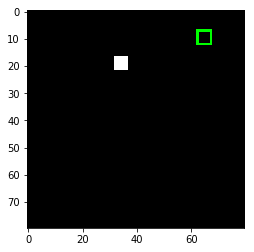

[array([[-0.00200707, -0.00202433]], dtype=float32), None]


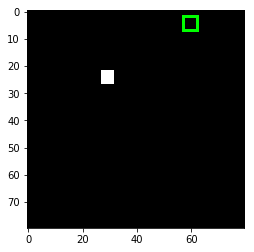

[array([[ 0.4979622 , -0.11025205]], dtype=float32), None]


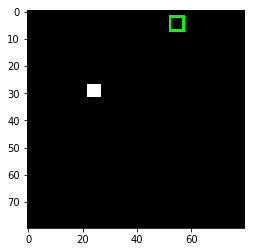

[array([[0.2099008 , 0.00163776]], dtype=float32), None]


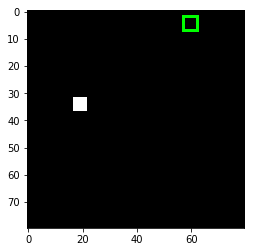

[array([[ 0.07625902, -0.34783635]], dtype=float32), None]


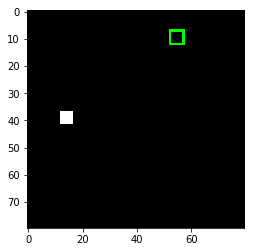

[array([[0.15775532, 0.4940019 ]], dtype=float32), None]


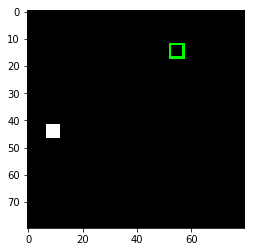

[array([[-0.37315035, -0.2963028 ]], dtype=float32), None]


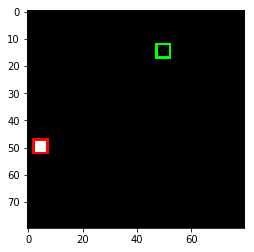

[1625.0, None]


30


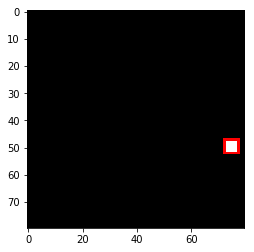

[array([[ 0.49481696, -0.00926434]], dtype=float32), None]


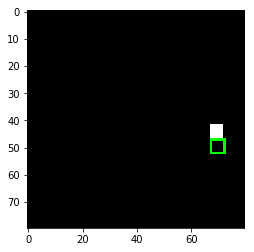

[array([[0.49768743, 0.02337903]], dtype=float32), None]


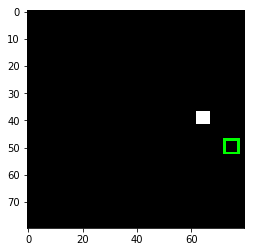

[array([[-0.00201421, -0.00199956]], dtype=float32), None]


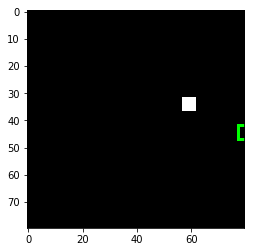

[array([[-0.00322006, -0.00140721]], dtype=float32), None]


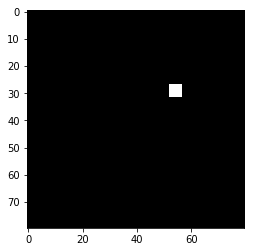

[array([[0.00095361, 0.13215518]], dtype=float32), None]


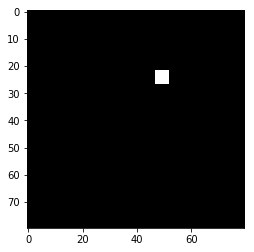

[array([[0.17911369, 0.26579976]], dtype=float32), None]


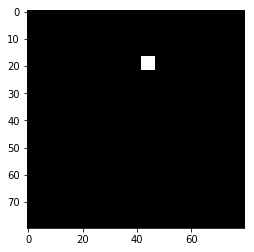

[array([[-0.32526115, -0.00183696]], dtype=float32), None]


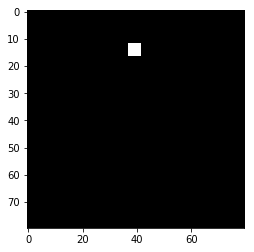

[array([[-0.31840903,  0.00136811]], dtype=float32), None]


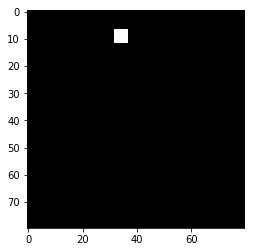

[array([[-0.02419941,  0.45887357]], dtype=float32), None]


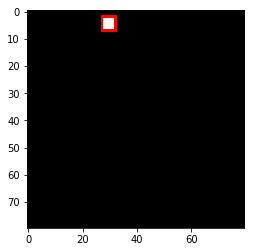

[2900.0, None]


31


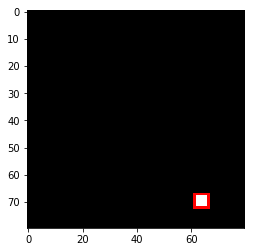

[array([[-0.00231008,  0.41202617]], dtype=float32), None]


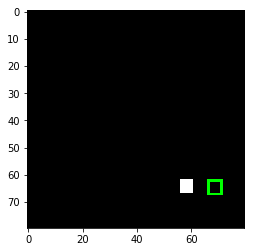

[array([[ 0.49758837, -0.00153193]], dtype=float32), None]


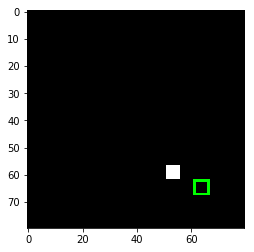

[array([[-0.00464312,  0.22962946]], dtype=float32), None]


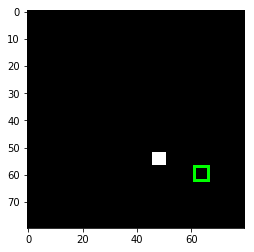

[array([[-0.002     , -0.00204808]], dtype=float32), None]


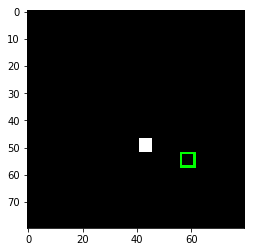

[array([[-0.00198561,  0.49610722]], dtype=float32), None]


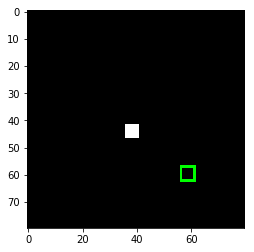

[array([[-0.00499006, -0.00257719]], dtype=float32), None]


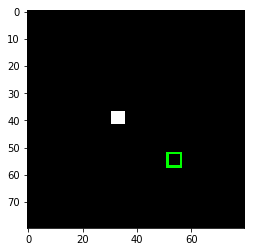

[array([[-0.00275198,  0.08536455]], dtype=float32), None]


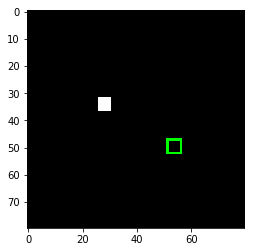

[array([[-0.00201151,  0.4370998 ]], dtype=float32), None]


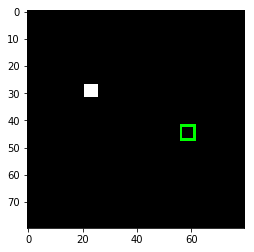

[array([[0.498     , 0.41621447]], dtype=float32), None]


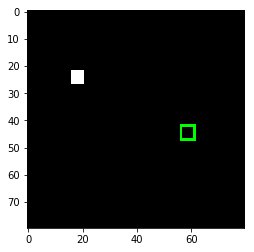

[array([[0.49275395, 0.47992253]], dtype=float32), None]


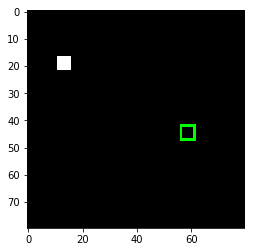

[array([[-0.00864987,  0.45764062]], dtype=float32), None]


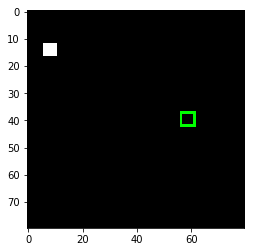

[array([[-0.1280777, -0.3184247]], dtype=float32), None]


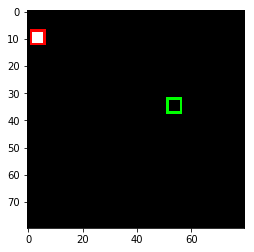

[1562.5, None]


32


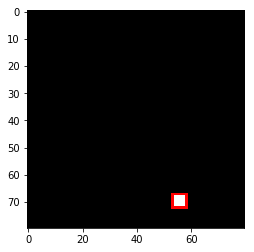

[array([[0.49729815, 0.15914768]], dtype=float32), None]


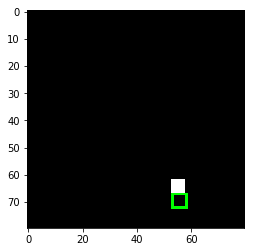

[array([[ 0.49201992, -0.00206308]], dtype=float32), None]


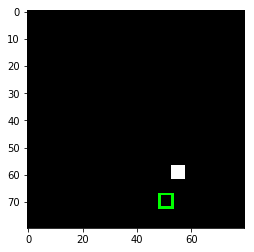

[array([[0.49186778, 0.00126165]], dtype=float32), None]


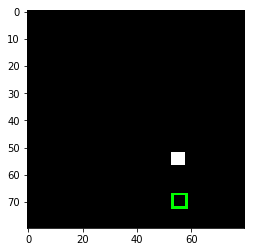

[array([[ 0.49711466, -0.00167888]], dtype=float32), None]


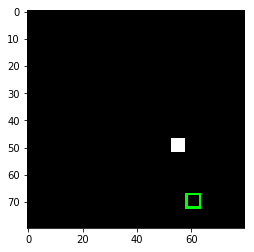

[array([[ 0.49505433, -0.00185758]], dtype=float32), None]


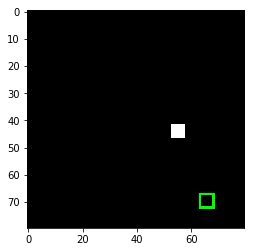

[array([[ 0.49586603, -0.00194389]], dtype=float32), None]


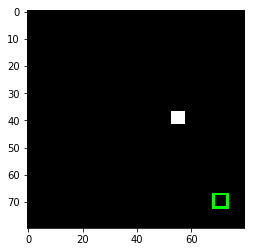

[array([[-0.00200055, -0.00199825]], dtype=float32), None]


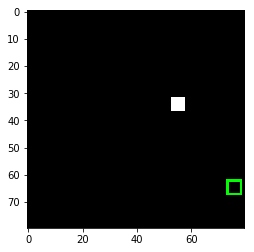

[array([[-0.00202735,  0.00220948]], dtype=float32), None]


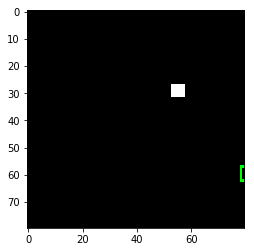

[array([[0.09386995, 0.0012278 ]], dtype=float32), None]


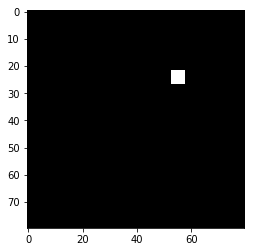

[array([[-0.00307992,  0.2679745 ]], dtype=float32), None]


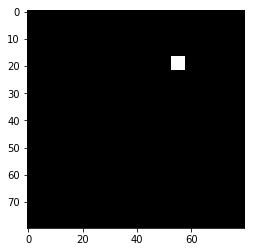

[array([[ 0.4978075, -0.7620508]], dtype=float32), None]


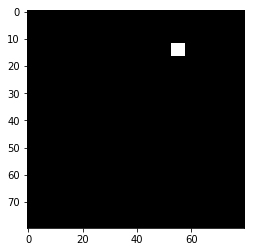

[array([[-0.03374556,  0.21488076]], dtype=float32), None]


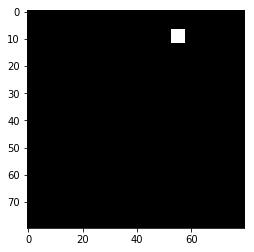

[array([[-0.0069144 ,  0.40471083]], dtype=float32), None]


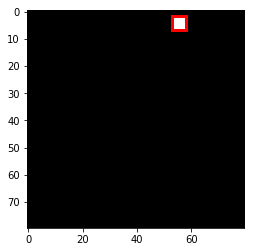

[1412.5, None]


33


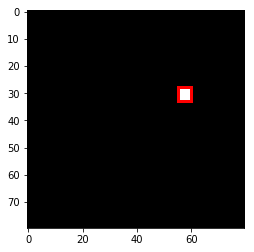

[array([[-0.0187209 , -0.00099963]], dtype=float32), None]


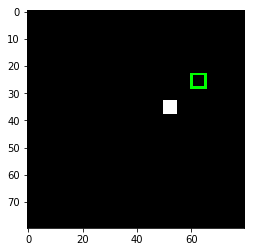

[array([[-0.04238513,  0.07497841]], dtype=float32), None]


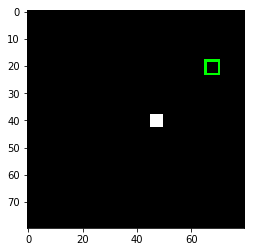

[array([[0.49782827, 0.49777836]], dtype=float32), None]


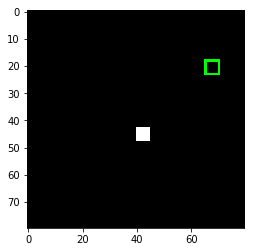

[array([[0.81127465, 0.02440393]], dtype=float32), None]


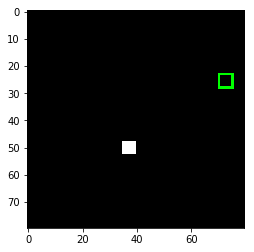

[array([[0.00612235, 0.23079786]], dtype=float32), None]


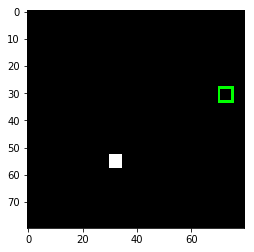

[array([[ 0.47713473, -0.00197726]], dtype=float32), None]


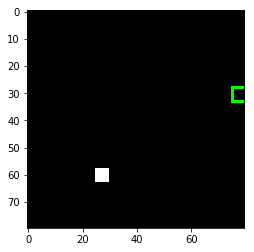

[array([[-0.00200496,  0.5751997 ]], dtype=float32), None]


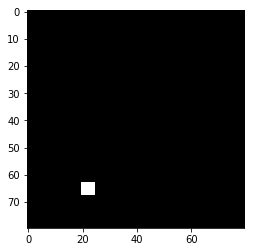

[array([[ 0.49799952, -0.00199836]], dtype=float32), None]


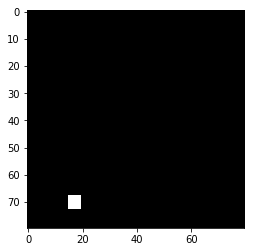

[array([[0.49557015, 0.49438798]], dtype=float32), None]


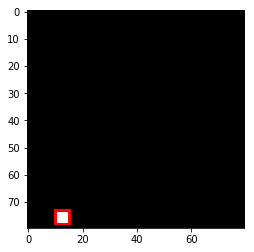

[4062.5, None]


34


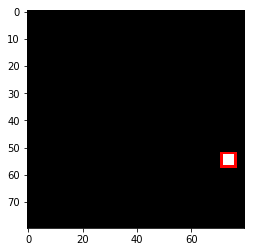

[array([[ 0.43026644, -0.00261546]], dtype=float32), None]


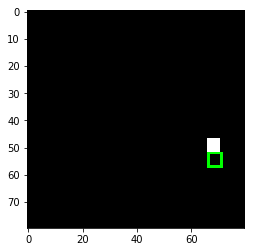

[array([[ 0.4979998 , -0.00194341]], dtype=float32), None]


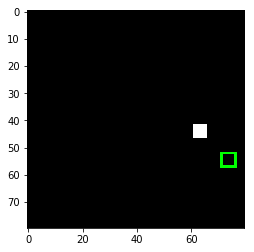

[array([[ 0.49829137, -0.00098473]], dtype=float32), None]


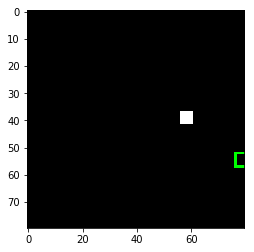

[array([[ 0.49858686, -0.00098747]], dtype=float32), None]


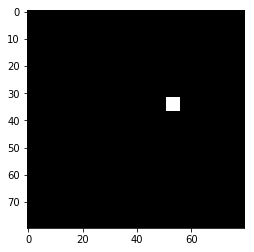

[array([[0.22735906, 0.00559515]], dtype=float32), None]


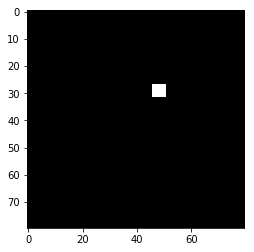

[array([[0.4521051 , 0.49750438]], dtype=float32), None]


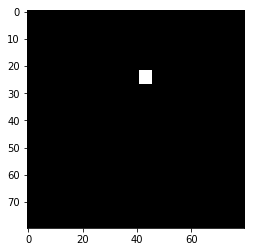

[array([[-0.03134644, -0.20858002]], dtype=float32), None]


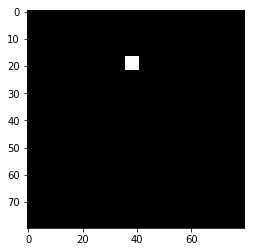

[array([[0.13420165, 0.12030488]], dtype=float32), None]


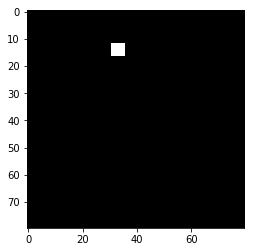

[array([[-0.4321474, -0.0727699]], dtype=float32), None]


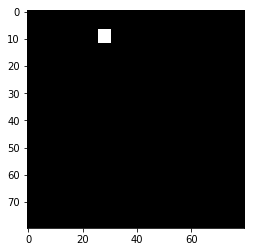

[array([[-0.00249751,  0.470847  ]], dtype=float32), None]


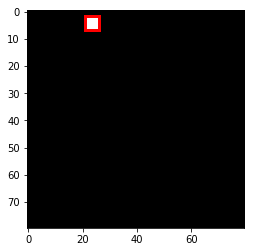

[2812.5, None]


35


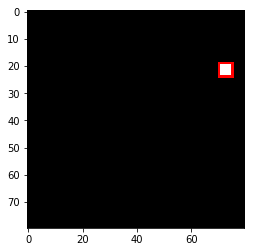

[array([[-0.12566467,  0.5696073 ]], dtype=float32), None]


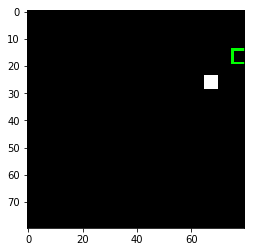

[array([[5.105313e-01, 5.900860e-05]], dtype=float32), None]


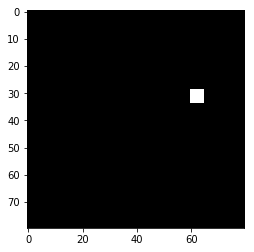

[array([[ 0.49893892, -0.00096363]], dtype=float32), None]


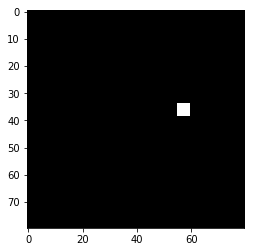

[array([[0.00349098, 0.00468862]], dtype=float32), None]


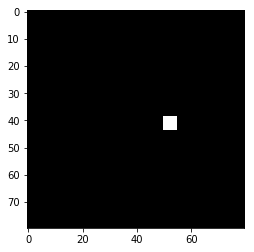

[array([[-0.00200005,  0.49797916]], dtype=float32), None]


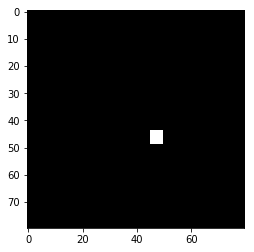

[array([[0.498    , 0.4794796]], dtype=float32), None]


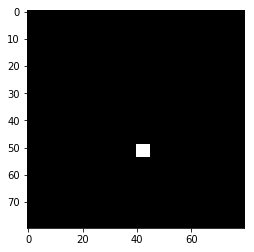

[array([[ 0.49734902, -0.93932605]], dtype=float32), None]


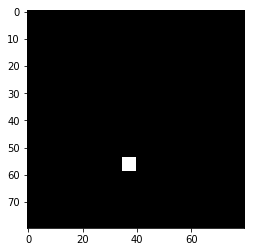

[array([[-0.22254813,  0.12112743]], dtype=float32), None]


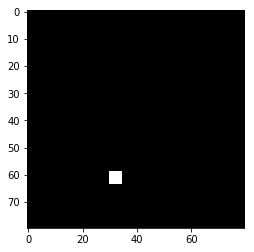

[array([[-0.00200215,  0.05354583]], dtype=float32), None]


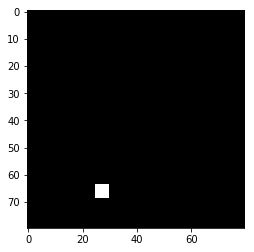

[array([[0.49999994, 0.2000351 ]], dtype=float32), None]


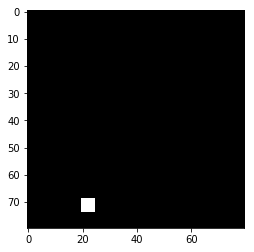

[array([[-0.00303338,  0.6011183 ]], dtype=float32), None]


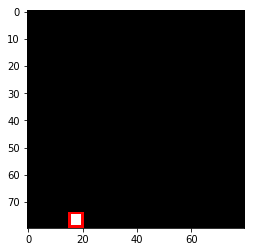

[6500.0, None]


36


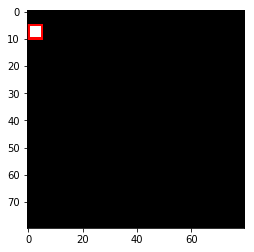

[array([[0.10789555, 0.39440274]], dtype=float32), None]


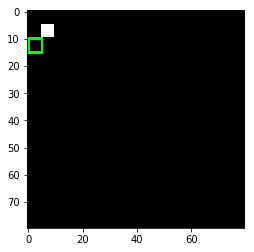

[array([[0.4905571 , 0.49691334]], dtype=float32), None]


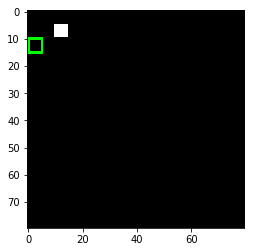

[array([[0.49799114, 0.4721213 ]], dtype=float32), None]


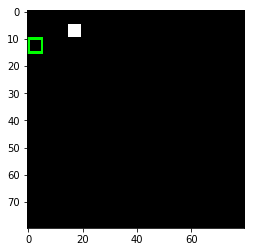

[array([[0.49498338, 0.04056406]], dtype=float32), None]


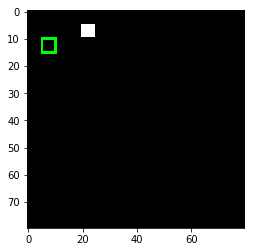

[array([[0.25630444, 0.13424921]], dtype=float32), None]


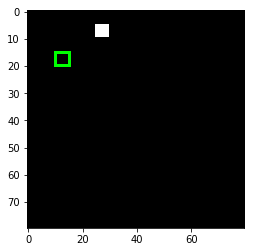

[array([[-0.076762  , -0.00181216]], dtype=float32), None]


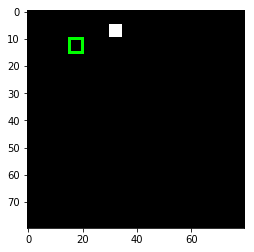

[array([[ 0.5925194 , -0.00190932]], dtype=float32), None]


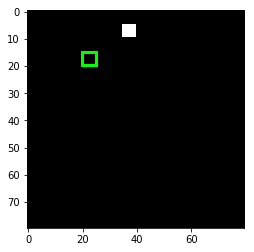

[array([[ 0.48180556, -0.00199848]], dtype=float32), None]


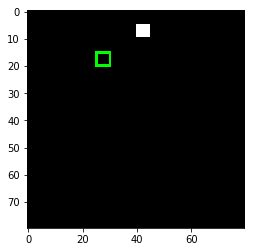

[array([[0.4970124 , 0.03577739]], dtype=float32), None]


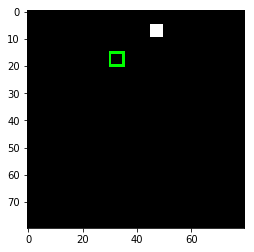

[array([[ 0.40000847, -0.02242613]], dtype=float32), None]


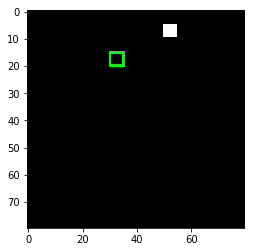

[array([[ 0.23924711, -0.00742682]], dtype=float32), None]


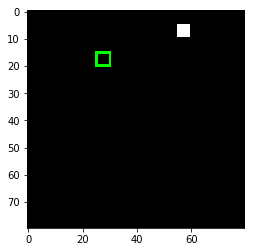

[array([[-0.01430655,  0.49787304]], dtype=float32), None]


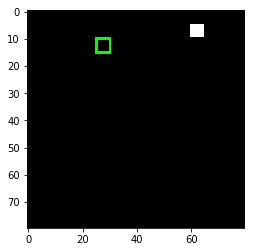

[array([[-0.00222153, -0.00256409]], dtype=float32), None]


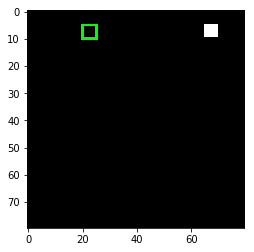

[array([[-0.00428508,  0.3893184 ]], dtype=float32), None]


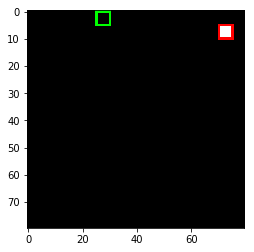

[1025.0, None]


37


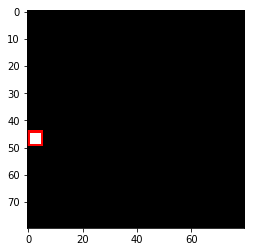

[array([[0.16918358, 0.41941893]], dtype=float32), None]


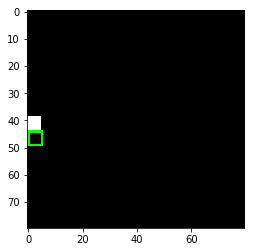

[array([[-0.31595567, -0.01013039]], dtype=float32), None]


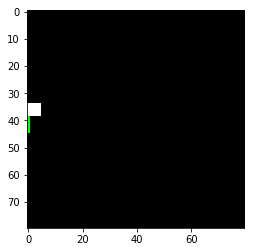

[array([[-0.1954145 ,  0.34897178]], dtype=float32), None]


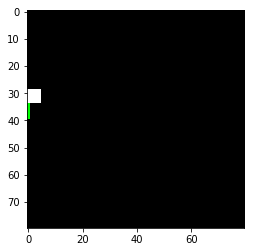

[array([[-0.48288962,  0.18058193]], dtype=float32), None]


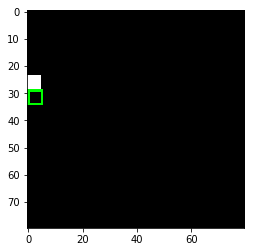

[array([[0.00576043, 0.02639002]], dtype=float32), None]


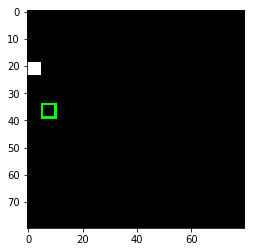

[array([[0.02416229, 0.22989506]], dtype=float32), None]


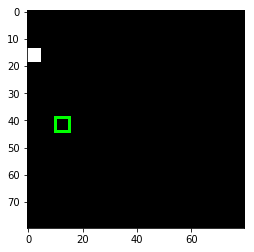

[array([[ 0.28976083, -0.91205007]], dtype=float32), None]


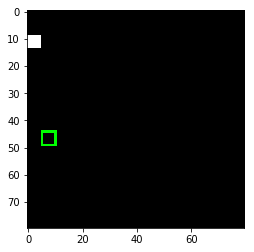

[array([[0.36901605, 0.00119632]], dtype=float32), None]


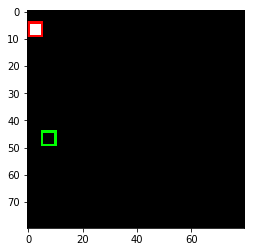

[812.5, None]


38


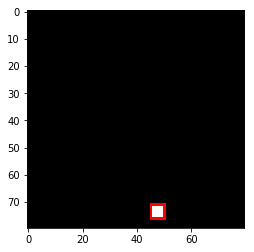

[array([[0.49785724, 0.04515702]], dtype=float32), None]


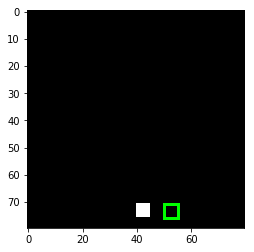

[array([[-0.0020053 ,  0.02326155]], dtype=float32), None]


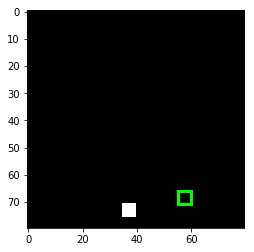

[array([[0.49799484, 0.00295663]], dtype=float32), None]


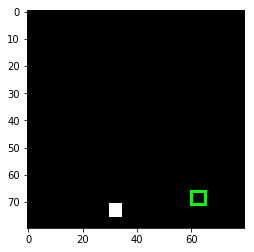

[array([[-0.00202786, -0.00177211]], dtype=float32), None]


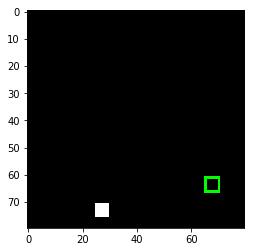

[array([[-0.0010002, -0.5439212]], dtype=float32), None]


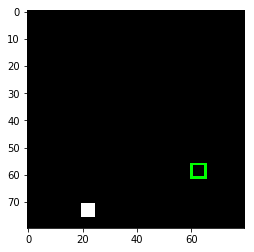

[array([[0.49799043, 0.00216544]], dtype=float32), None]


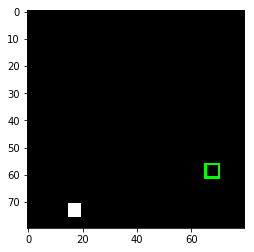

[array([[0.49437797, 0.2514109 ]], dtype=float32), None]


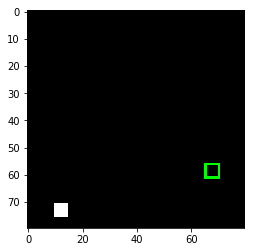

[array([[-0.06626032,  0.20228183]], dtype=float32), None]


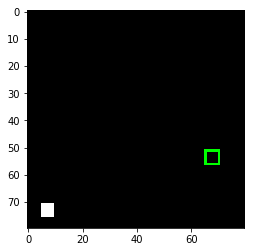

[array([[ 0.49179083, -0.00567946]], dtype=float32), None]


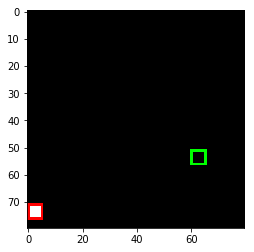

[2000.0, None]


39


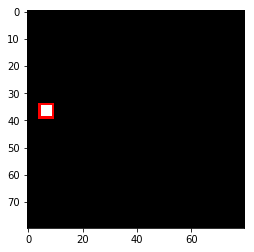

[array([[-0.00192338,  0.07792491]], dtype=float32), None]


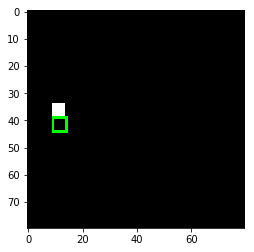

[array([[-0.36908585,  0.00206518]], dtype=float32), None]


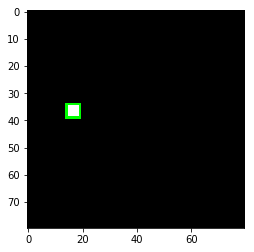

[array([[-0.00300102, -0.00199014]], dtype=float32), None]


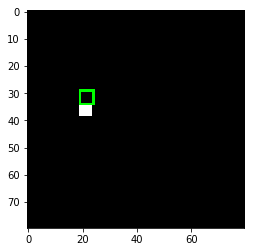

[array([[0.01236427, 0.07112187]], dtype=float32), None]


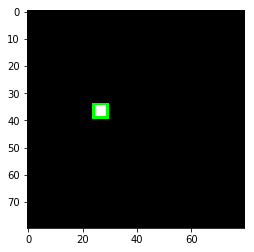

[array([[-0.00202432, -0.0285579 ]], dtype=float32), None]


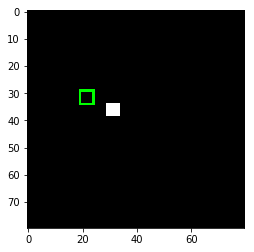

[array([[0.49792045, 0.21316472]], dtype=float32), None]


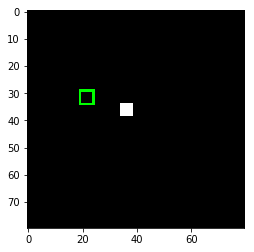

[array([[0.4979934, 0.6012695]], dtype=float32), None]


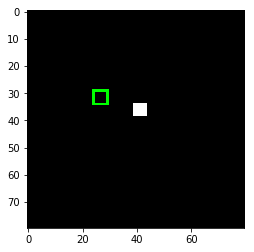

[array([[ 0.01570338, -0.00103325]], dtype=float32), None]


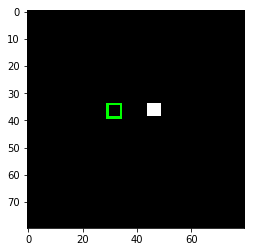

[array([[ 0.3861633 , -0.00199765]], dtype=float32), None]


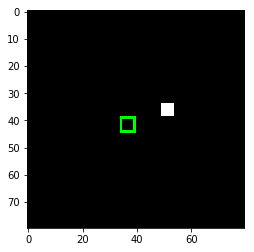

[array([[ 0.4978458, -0.0019998]], dtype=float32), None]


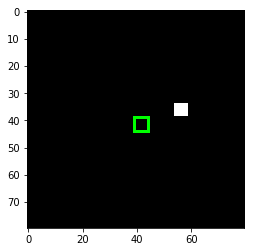

[array([[-0.0020227 , -0.00155526]], dtype=float32), None]


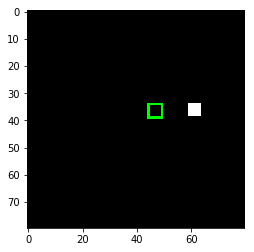

[array([[0.6395529 , 0.00307769]], dtype=float32), None]


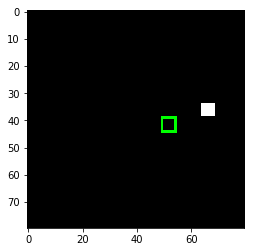

[array([[0.00895536, 0.25936502]], dtype=float32), None]


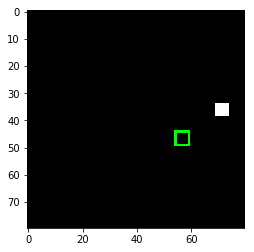

[array([[ 0.49224123, -0.59573406]], dtype=float32), None]


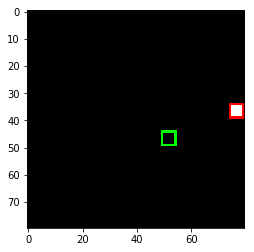

[362.5, None]


40


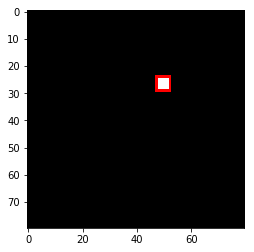

[array([[0.3929541 , 0.26591235]], dtype=float32), None]


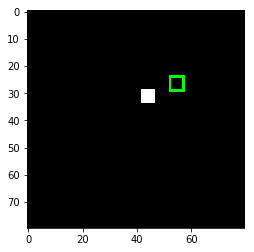

[array([[0.49799994, 0.36533585]], dtype=float32), None]


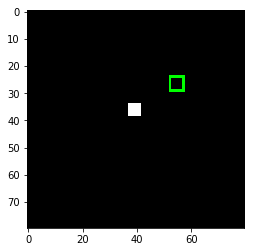

[array([[ 0.10843933, -0.00315655]], dtype=float32), None]


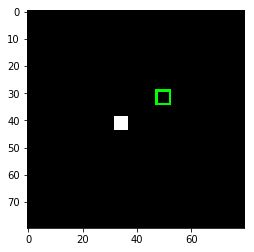

[array([[0.27227855, 0.8963169 ]], dtype=float32), None]


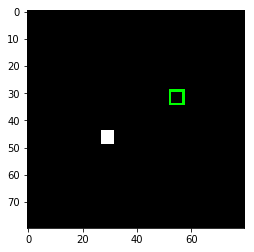

[array([[-0.01156672, -0.06787567]], dtype=float32), None]


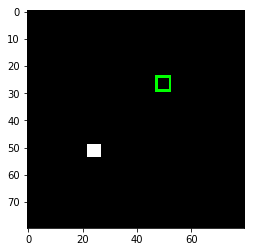

[array([[ 0.26816398, -0.06962094]], dtype=float32), None]


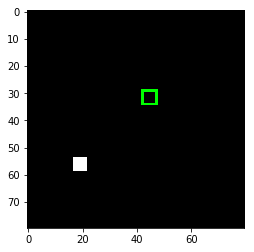

[array([[4.9692652e-01, 2.8157234e-04]], dtype=float32), None]


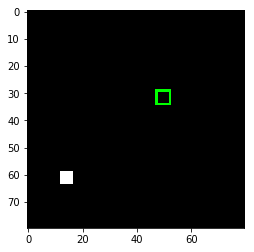

[array([[-0.00245119,  0.02480072]], dtype=float32), None]


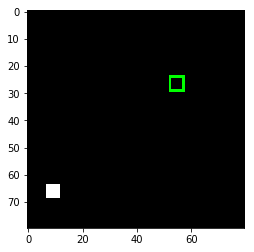

[array([[-0.0073373 ,  0.45793796]], dtype=float32), None]


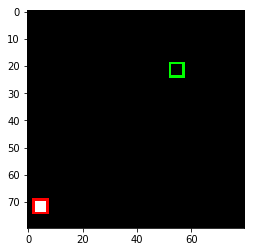

[2500.0, None]


41


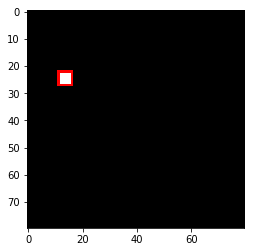

[array([[0.49799526, 0.03121614]], dtype=float32), None]


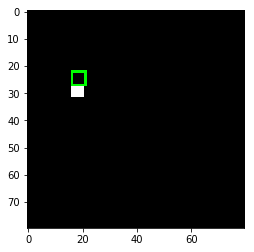

[array([[ 0.29153156, -0.0018875 ]], dtype=float32), None]


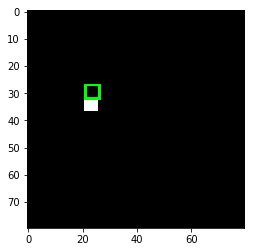

[array([[ 0.16074109, -0.04256421]], dtype=float32), None]


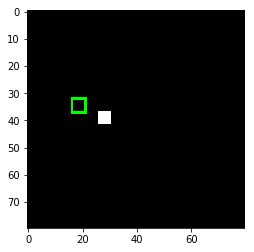

[array([[-0.00198764,  0.48393458]], dtype=float32), None]


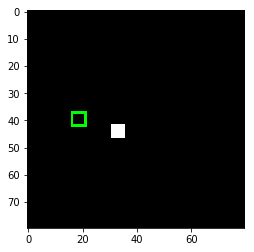

[array([[-0.01613184,  0.05587804]], dtype=float32), None]


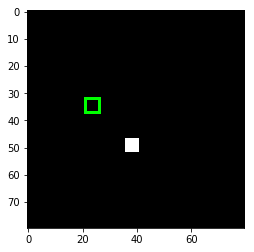

[array([[-0.0020092 ,  0.80933666]], dtype=float32), None]


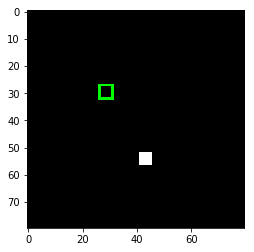

[array([[ 0.49298134, -0.09323683]], dtype=float32), None]


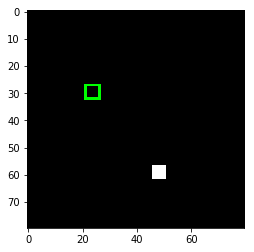

[array([[-0.10882963, -0.05028   ]], dtype=float32), None]


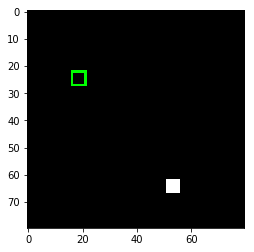

[array([[ 0.49788517, -0.00196117]], dtype=float32), None]


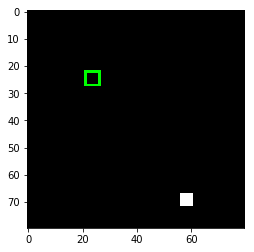

[array([[-0.00313388, -0.05092257]], dtype=float32), None]


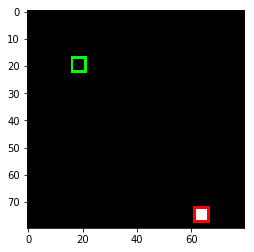

[2525.0, None]


42


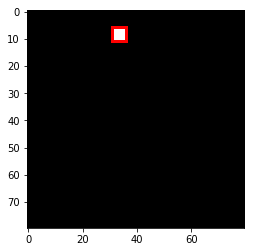

[array([[ 0.10329044, -0.00193948]], dtype=float32), None]


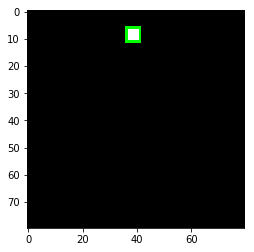

[array([[-0.13113984, -0.00099975]], dtype=float32), None]


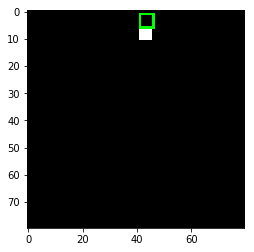

[array([[0.49673876, 0.26949495]], dtype=float32), None]


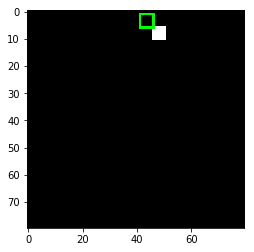

[array([[-0.03294235,  0.21273613]], dtype=float32), None]


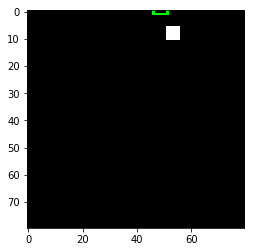

[array([[0.29156297, 0.4924926 ]], dtype=float32), None]


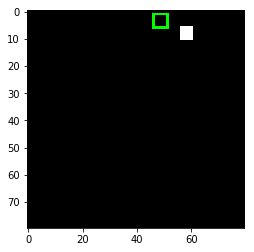

[array([[ 0.44723526, -0.002046  ]], dtype=float32), None]


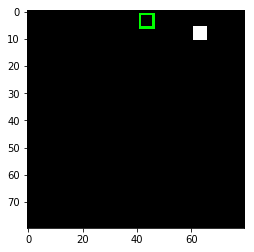

[array([[-0.00205915,  0.47976744]], dtype=float32), None]


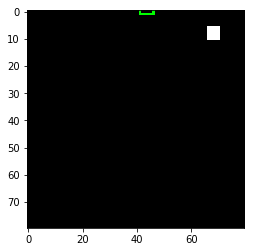

[array([[-0.00543758,  0.22513837]], dtype=float32), None]


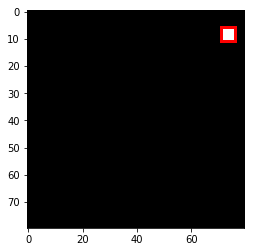

[425.0, None]


43


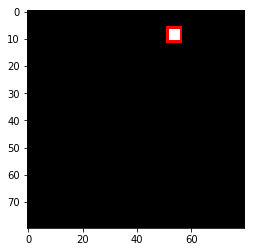

[array([[0.49826062, 0.3050523 ]], dtype=float32), None]


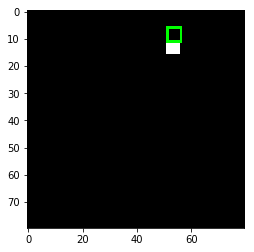

[array([[ 7.770162e-01, -7.542372e-04]], dtype=float32), None]


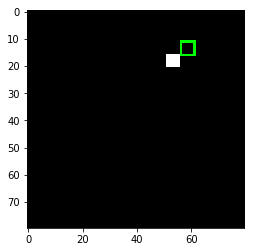

[array([[ 0.00224781, -0.00188154]], dtype=float32), None]


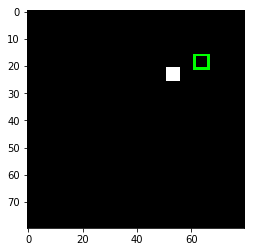

[array([[-0.18794882, -0.00173634]], dtype=float32), None]


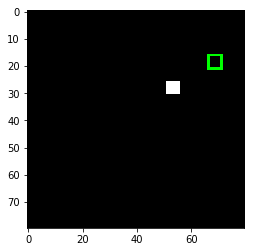

[array([[-0.02877518, -0.00198048]], dtype=float32), None]


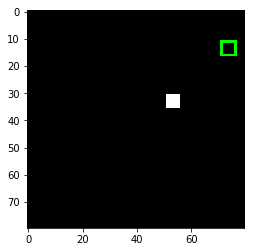

[array([[ 0.47800642, -0.00180393]], dtype=float32), None]


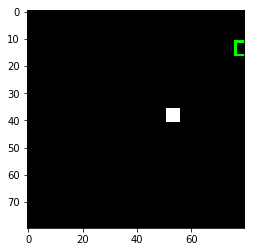

[array([[0.5561158 , 0.07586661]], dtype=float32), None]


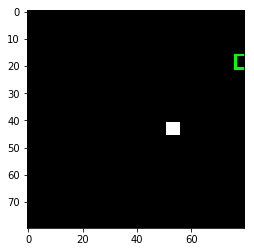

[array([[-0.00528756, -0.00111932]], dtype=float32), None]


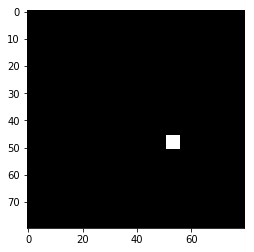

[array([[ 0.32929027, -0.00199574]], dtype=float32), None]


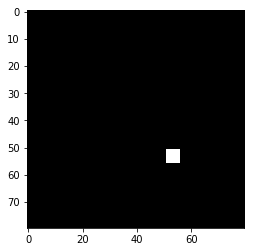

[array([[-0.00253059,  0.49712214]], dtype=float32), None]


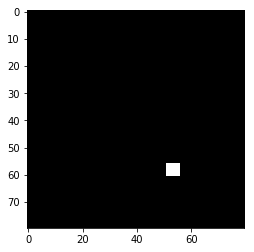

[array([[ 0.47646177, -0.00565769]], dtype=float32), None]


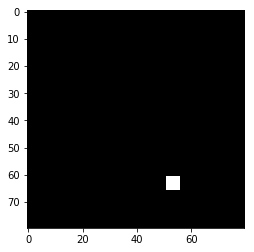

[array([[0.49796483, 0.23557475]], dtype=float32), None]


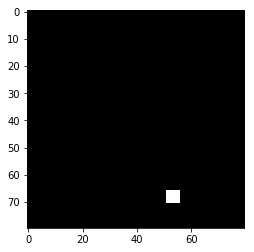

[array([[0.498    , 0.4328993]], dtype=float32), None]


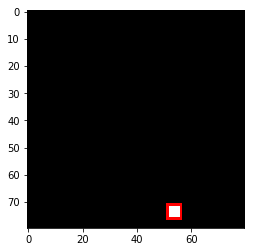

[2562.5, None]


44


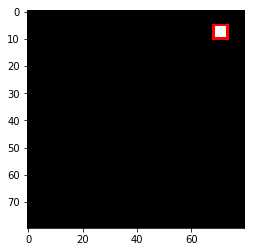

[array([[-0.00136805, -0.00120355]], dtype=float32), None]


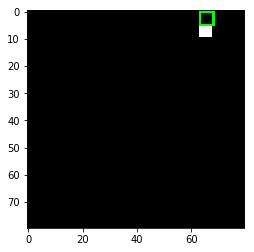

[array([[ 0.800436  , -0.00289456]], dtype=float32), None]


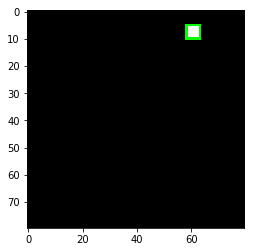

[array([[0.3680138 , 0.41493642]], dtype=float32), None]


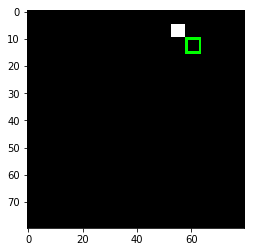

[array([[0.49794894, 0.3000466 ]], dtype=float32), None]


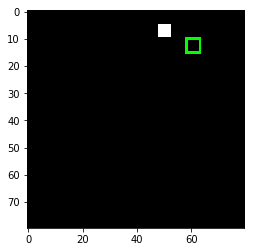

KeyboardInterrupt: 

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t in trajectories:
        print
        print
        print t
        prev = np.array([[annotations[t]['start_x'], annotations[t]['start_y']]])
        img = cv2.imread(trajectories[t][0])
        cv2.rectangle(img,(prev[0][0], prev[0][1]),(prev[0][0]+target_width, prev[0][1]+target_height),(255,0,0),1)
        plt.imshow(img)
        plt.show()
        for i in xrange(1, len(trajectories[t])):
            img = cv2.imread(trajectories[t][i], cv2.IMREAD_GRAYSCALE)
            thresh, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            img = np.array([img])
            img = tf.expand_dims(img, axis=3).eval()
            
            output = sess.run(final, feed_dict={X: img, prev_bbox: prev})
            sess.run(y.assign(output))
            down_prob = output[0][0]
            right_prob = output[0][1]
            #print 'Down prob: ' + str(down_prob)
            #print 'Right prob: ' + str(right_prob)
            
            x = annotations[t]
            d = np.random.uniform()
            r = np.random.uniform()
            
            #print 'Generated number down: ' + str(d)
            #print 'Generated number right: ' + str(r)
            
            down = 1 if d < down_prob else 0 if d < (down_prob + 1)/2 else -1
            right = 1 if r < right_prob else 0 if r < (right_prob + 1)/2 else -1
            random_step_size = step_sizes[np.random.randint(0, len(step_sizes))]
            current = np.array([[prev[0][0] + right*random_step_size, prev[0][1] + down*random_step_size]])
            
            action_d = 1 if down == 1 else 0.5 if down == 0 else 0
            action_r = 1 if right == 1 else 0.5 if right == 0 else 0
            
            sess.run(current_bbox.assign(tf.convert_to_tensor(current, dtype=tf.float32)))
            sess.run(action.assign(tf.convert_to_tensor([[action_d, action_r]], dtype=tf.float32)))
            sess.run(y.assign(tf.convert_to_tensor(output)))
            print(sess.run([loss_individual, train_individual]))
            
            img = cv2.imread(trajectories[t][i])
            cv2.rectangle(img,(current[0][0], current[0][1]),(current[0][0]+target_width, current[0][1]+target_height),(0,255,0),1)
            if i == len(trajectories[t]) - 1:
                cv2.rectangle(img,(annotations[t]['end_x'], annotations[t]['end_y']),(annotations[t]['end_x']+target_width, annotations[t]['end_y']+target_height),(255,0,0),1)
            plt.imshow(img)
            plt.show()
            
            if i == len(trajectories[t]) - 1:
                sess.run(final_bbox.assign(tf.convert_to_tensor(current, dtype=tf.float32)))
                print(sess.run([final_loss, train_final], feed_dict={current_trajectory_annotations: np.array([[annotations[t]['end_x'], annotations[t]['end_y']]])}))
            
            prev = current